In [2]:
# Importing pandas library
import pandas as pd

#importing pandas_profiling to help create a dataframe report on our dataset
import pandas_profiling


In [3]:
#Importing the King County data into pandas and running the head to get an over view of the dataset,
#followed by the .info to see the number of rows, number of null values and dtypes in the dataframe

df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
# creating a profile report on the dataset with an HTML output
profile = df.profile_report(title='KC Housing Report')
profile.to_file(output_file="KCHousing.html")

In [7]:
#A quick check of the value counts to see if there are any major inconsistancies or null values

for col in df.columns:
    print("\n",df[col].value_counts().head(),"\n\n")


 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64 



 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64 



 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
Name: price, dtype: int64 



 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64 



 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
Name: bathrooms, dtype: int64 



 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64 



 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: int64 



 1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
Name: floors, dtype: int64 



 0.0    19075
1.0      146
Name: waterfront, dtype: int64 



 0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64 



 3    14020
4     5677
5     1701
2 

In [8]:
#Retrieving the total sum of null values in each column

df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# EDA

## Initial cleaning

### Views

With our initial look at the data, we noticed that 89.9% of the properties listed had 0 views. It is highly unlikely that that 19422 properties have been sold without a single view. Therefore it is logical to assume that this column is unreliable and can therefore be removed.

In [9]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [10]:
df = df.drop('view', axis =1)

In [11]:
#a quick check to confirm that the column has successfully been removed from the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(2)
memory usage: 3.3+ MB


In [12]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Waterfront

Based on our mapping of the properties, using geopandas, we noticed that there are clearly more than 146 properties that have a view of the waterfront let alone the ones that are on the waterfront. Furthermore, the 2376 missing will still not account for the actual number of properties with views of the waterfront. 

We therefore consider this column as unreliable and are therefore dropping it

In [16]:
# importing geopandas, descartes and matplotlib inorder to map out all the properties on a map of seattle

import geopandas as gpd
import descartes
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
#importing shapely inorder to incorporate the longitude and the latitude with geopandas

from shapely.geometry import Point, Polygon

In [18]:
#creating a shapley point based on a tuple of the long and lat
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geometry[:5]

In [19]:
# intiialising the coordinate reference system to allow geopandas to plot the long and lats of the different 
#properties

crs = {'init' : 'epsg:4326'}

In [20]:
#importing the shape file of the king county map

street_map = gpd.read_file('./tl_2017_53033_roads/tl_2017_53033_roads.shp')

In [21]:
# converting our dataframe into a geopandas dataframe

geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  condition  ...  sqft_above  sqft_basement  \
0      5650     1.0         NaN          3  ...        1180            0.0   
1      7242     2.0         0.0          3  ...        2170          400.0   
2     10000     1.0         0.0          3  ...         770            0.0   
3      5000     1.0         0.0          5  ...        1050          910.0   
4      8080     1.0         0.0          3  ...        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0     1955           0.0    98178  47.5112 -122.257           1340   
1     1951        1991.0    98125  47.7210 -122.319           1690   
2     1933           NaN    98028  47.7379 -122.233           2720   
3     1965           0.0    98136  47.5208 -122.393           1360   
4     1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15                     geometry  
0        5650  POINT (-122.25700 47.51120)  
1        7639  POINT (-122.31900 47.72100)  
2        8062  POINT (-122.23300 47.73790)  
3        5000  POINT (-122.39300 47.52080)  
4        7503  POINT (-122.04500 47.61680)  

[5 rows x 21 columns]

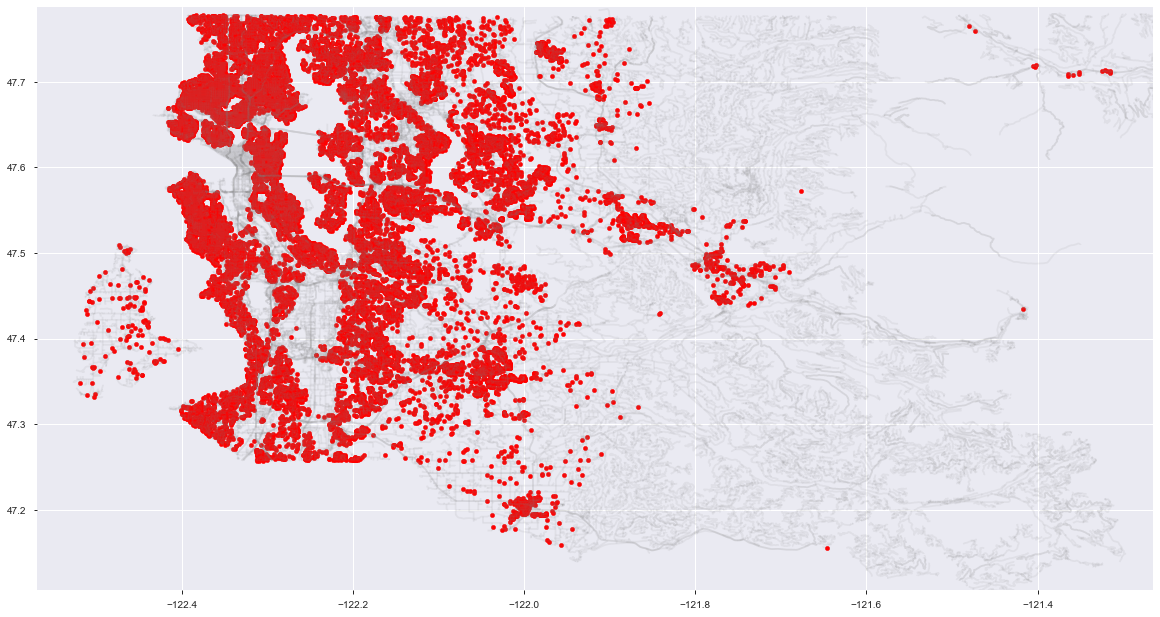

In [22]:
#maping the property listings on the king county map.
#we have limitid the map size as none of the properties hit the edges of the map
fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax =ax, alpha = 0.1, color = "grey")
geo_df.plot(ax=ax, markersize = 20, color='red')
minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx-0.05, maxx+0.05)
ax.set_ylim(miny-0.05, maxy+0.01)
plt.savefig('KC_properties.png')

In [23]:
df = df.drop(['waterfront'], axis = 1)

In [24]:
#a quick check to confirm that the column has successfully been removed from the dataframe. 
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'geometry'],
      dtype='object')

## Year Renovated

During our analysis of the data we noticed that 17.8% of the year renovated data are null values. After furher investigation we found the majority of the properties, 78.8% have not been renovated. Therefore it is relatively safe to assume that these properties have also not been renovated. 

We have therefore replace the null values with the mode.

In [25]:
df['yr_renovated'].value_counts().head()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

In [26]:
#getting and replacing the null values with the mode.

renovated_mode = float(df.yr_renovated.mode())
df['yr_renovated'].fillna(renovated_mode, inplace =True)

In [27]:
#Checking to see if the null values in yr_renovated have been filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
geometry         21597 non-null geometry
dtypes: float64(6), geometry(1), int64(11), object(2)
memory usage: 3.3+ MB


## sqft_basement

A quick look at the df.info() shows that the sqft_basement is an object, after further investigation we noticed that the problem was 454 listing had a '?' as the value. In order to correct this we had to convert the column to a numeric column. 

In order to replace the the missing values we created a new column subtracting the the sqft_living from the sqft_above. We then created a boolean column to verify our calculations.

In [28]:
# Because sqft_basememnt is listed as an object, we need to analyze the data and see if there are any values 
# that are not ints or floats

#Clearly in this case there is a '?' as a value which is forcing the column to be an Object.

df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [29]:
#Converting to_numeric
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors = 'coerce')

In [30]:
#As we can see the '?' values have now become nulll values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
geometry         21597 non-null geometry
dtypes: float64(7), geometry(1), int64(11), object(1)
memory usage: 3.3+ MB


In [31]:
df['sqft_basement2'] = df['sqft_living'] - df['sqft_above']

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21143 non-null float64
yr_built          21597 non-null int64
yr_renovated      21597 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
geometry          21597 non-null geometry
sqft_basement2    21597 non-null int64
dtypes: float64(7), geometry(1), int64(12), object(1)


In [33]:
df.sqft_basement.value_counts().head()

0.0      12826
600.0      217
500.0      209
700.0      208
800.0      201
Name: sqft_basement, dtype: int64

In [34]:
#Creating a boolean coolum to check if the values are eaqual.

df['basement_bool'] =  df['sqft_basement'].eq(df['sqft_basement2'])

In [35]:
df.head(20)

id        date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520  10/13/2014   221900.0         3       1.00         1180   
1   6414100192   12/9/2014   538000.0         3       2.25         2570   
2   5631500400   2/25/2015   180000.0         2       1.00          770   
3   2487200875   12/9/2014   604000.0         4       3.00         1960   
4   1954400510   2/18/2015   510000.0         3       2.00         1680   
5   7237550310   5/12/2014  1230000.0         4       4.50         5420   
6   1321400060   6/27/2014   257500.0         3       2.25         1715   
7   2008000270   1/15/2015   291850.0         3       1.50         1060   
8   2414600126   4/15/2015   229500.0         3       1.00         1780   
9   3793500160   3/12/2015   323000.0         3       2.50         1890   
10  1736800520    4/3/2015   662500.0         3       2.50         3560   
11  9212900260   5/27/2014   468000.0         2       1.00         1160   
12   114101516   5/28/2014   310000.0         3       1.00         1430   
13  6054650070   10/7/2014   400000.0         3       1.75         1370   
14  1175000570   3/12/2015   530000.0         5       2.00         1810   
15  9297300055   1/24/2015   650000.0         4       3.00         2950   
16  1875500060   7/31/2014   395000.0         3       2.00         1890   
17  6865200140   5/29/2014   485000.0         4       1.00         1600   
18    16000397   12/5/2014   189000.0         2       1.00         1200   
19  7983200060   4/24/2015   230000.0         3       1.00         1250   

    sqft_lot  floors  condition  grade  ...  yr_built  yr_renovated  zipcode  \
0       5650     1.0          3      7  ...      1955           0.0    98178   
1       7242     2.0          3      7  ...      1951        1991.0    98125   
2      10000     1.0          3      6  ...      1933           0.0    98028   
3       5000     1.0          5      7  ...      1965           0.0    98136   
4       8080     1.0          3      8  ...      1987           0.0    98074   
5     101930     1.0          3     11  ...      2001           0.0    98053   
6       6819     2.0          3      7  ...      1995           0.0    98003   
7       9711     1.0          3      7  ...      1963           0.0    98198   
8       7470     1.0          3      7  ...      1960           0.0    98146   
9       6560     2.0          3      7  ...      2003           0.0    98038   
10      9796     1.0          3      8  ...      1965           0.0    98007   
11      6000     1.0          4      7  ...      1942           0.0    98115   
12     19901     1.5          4      7  ...      1927           0.0    98028   
13      9680     1.0          4      7  ...      1977           0.0    98074   
14      4850     1.5          3      7  ...      1900           0.0    98107   
15      5000     2.0          3      9  ...      1979           0.0    98126   
16     14040     2.0          3      7  ...      1994           0.0    98019   
17      4300     1.5          4      7  ...      1916           0.0    98103   
18      9850     1.0          4      7  ...      1921           0.0    98002   
19      9774     1.0          4      7  ...      1969           0.0    98003   

        lat     long  sqft_living15  sqft_lot15                     geometry  \
0   47.5112 -122.257           1340        5650  POINT (-122.25700 47.51120)   
1   47.7210 -122.319           1690        7639  POINT (-122.31900 47.72100)   
2   47.7379 -122.233           2720        8062  POINT (-122.23300 47.73790)   
3   47.5208 -122.393           1360        5000  POINT (-122.39300 47.52080)   
4   47.6168 -122.045           1800        7503  POINT (-122.04500 47.61680)   
5   47.6561 -122.005           4760      101930  POINT (-122.00500 47.65610)   
6   47.3097 -122.327           2238        6819  POINT (-122.32700 47.30970)   
7   47.4095 -122.315           1650        9711  POINT (-122.31500 47.40950)   
8   47.5123 -122.337           1780

In [36]:
#checking the number of false values
false_basement = df[df['basement_bool']==False]

In [37]:
#As we can through the boolean column we have correctly identified and corrected the mistakes in the sqft_basement. 
#As we now have the correct data in sqft_basement2 we can drop sqft_basement 
false_basement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 6 to 21581
Data columns (total 22 columns):
id                454 non-null int64
date              454 non-null object
price             454 non-null float64
bedrooms          454 non-null int64
bathrooms         454 non-null float64
sqft_living       454 non-null int64
sqft_lot          454 non-null int64
floors            454 non-null float64
condition         454 non-null int64
grade             454 non-null int64
sqft_above        454 non-null int64
sqft_basement     0 non-null float64
yr_built          454 non-null int64
yr_renovated      454 non-null float64
zipcode           454 non-null int64
lat               454 non-null float64
long              454 non-null float64
sqft_living15     454 non-null int64
sqft_lot15        454 non-null int64
geometry          454 non-null geometry
sqft_basement2    454 non-null int64
basement_bool     454 non-null bool
dtypes: bool(1), float64(7), geometry(1), int64(12), object(1)
m

In [38]:
df = df.drop('sqft_basement', axis =1)

In [39]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
condition         0
grade             0
sqft_above        0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
geometry          0
sqft_basement2    0
basement_bool     0
dtype: int64

## Finding Duplicate 'id's

Checking to see if there are any duplicates that have significant value. if they dont have any significant value then we can remove them. 

After analysing the data for duplicates,we initially found found 177 duplicates of those we decide to remove 3 properties as they were bought and sold for the same price thus having no significant impact on our overall data.

In [40]:
# Checking for duplicates in the id column
dups = df[df.duplicated(subset=['id','price'], keep = 'last')]

In [41]:
dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 3946 to 20037
Data columns (total 21 columns):
id                3 non-null int64
date              3 non-null object
price             3 non-null float64
bedrooms          3 non-null int64
bathrooms         3 non-null float64
sqft_living       3 non-null int64
sqft_lot          3 non-null int64
floors            3 non-null float64
condition         3 non-null int64
grade             3 non-null int64
sqft_above        3 non-null int64
yr_built          3 non-null int64
yr_renovated      3 non-null float64
zipcode           3 non-null int64
lat               3 non-null float64
long              3 non-null float64
sqft_living15     3 non-null int64
sqft_lot15        3 non-null int64
geometry          3 non-null geometry
sqft_basement2    3 non-null int64
basement_bool     3 non-null bool
dtypes: bool(1), float64(6), geometry(1), int64(12), object(1)
memory usage: 507.0+ bytes


In [42]:
dups

id       date     price  bedrooms  bathrooms  sqft_living  \
3946   1825069031  8/14/2014  550000.0         4       1.75         2410   
14968  6308000010  12/8/2014  585000.0         3       2.50         2290   
20037  8648900110   5/5/2014  555000.0         3       2.50         1940   

       sqft_lot  floors  condition  grade  ...  yr_built  yr_renovated  \
3946       8447     2.0          4      8  ...      1936        1980.0   
14968      5089     2.0          3      9  ...      2001           0.0   
20037      3211     2.0          3      8  ...      2009           0.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  \
3946     98074  47.6499 -122.088           2520       14789   
14968    98006  47.5443 -122.172           2290        7984   
20037    98027  47.5644 -122.093           1880        3078   

                          geometry sqft_basement2  basement_bool  
3946   POINT (-122.08800 47.64990)            350           True  
14968  POINT (-122.17200 47.54430)              0           True  
20037  POINT (-122.09300 47.56440)              0           True  

[3 rows x 21 columns]

In [43]:
id_list = list(dups.id.values)

In [44]:
df= df.drop_duplicates(subset = ['id', 'price'], keep = 'first')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21594 entries, 0 to 21596
Data columns (total 21 columns):
id                21594 non-null int64
date              21594 non-null object
price             21594 non-null float64
bedrooms          21594 non-null int64
bathrooms         21594 non-null float64
sqft_living       21594 non-null int64
sqft_lot          21594 non-null int64
floors            21594 non-null float64
condition         21594 non-null int64
grade             21594 non-null int64
sqft_above        21594 non-null int64
yr_built          21594 non-null int64
yr_renovated      21594 non-null float64
zipcode           21594 non-null int64
lat               21594 non-null float64
long              21594 non-null float64
sqft_living15     21594 non-null int64
sqft_lot15        21594 non-null int64
geometry          21594 non-null geometry
sqft_basement2    21594 non-null int64
basement_bool     21594 non-null bool
dtypes: bool(1), float64(6), geometry(1), int64(12), obje

# Questions

Looking at the top 2000 high end properties and comparing them to a random sample set of similar size, we wanted to understand:

<ol>
    <li>What makes a property high end?</li>
    <ol>
        <li>Living size</li>
        <li>Lot size</li>
        <li>Location</li>
        <li>Sqft_linving15</li>
        <li>sqft_lot15</li>
        <li>Zipcode</li></ol>

   <li>Does the number of bedrooms affect the overall price?</li>
   <li>Does the year built affect the overall price?</li>
   </ol>


## Method
Our initial approach to the questions begins with understanding the data as a whole. Once we have ploted and understood the data we created two subsets: the first being top 2000 most expensive properties, the second a random sample made up of 2000 properties not including the most expensive.

Through this we were able to compare the differences of the two subsests and find what defines the high end properties.

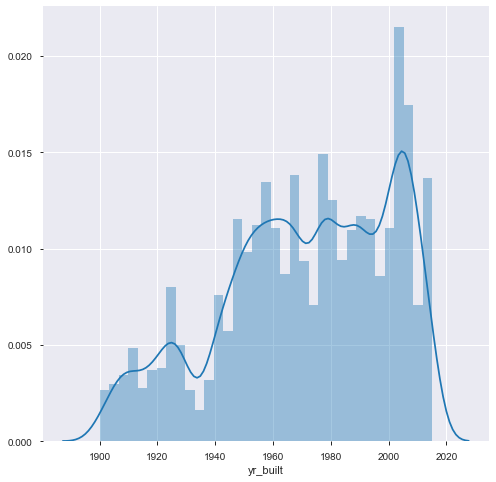

In [46]:
#looking at the distribubtion of properties base on year built

plt.figure(figsize = (8,8))
ax = sns.distplot(df['yr_built'])


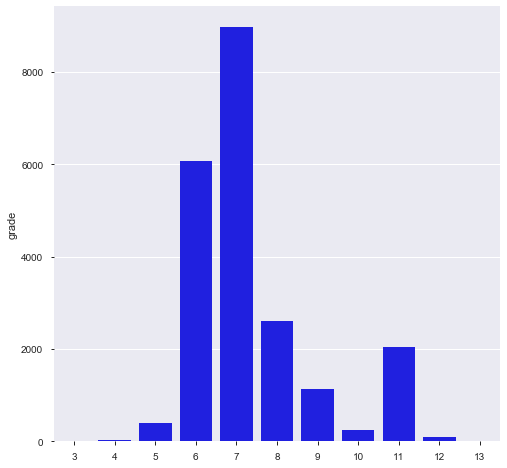

In [47]:
#checking the number of properties based on grade
plt.figure(figsize = (8,8))
ax2= sns.barplot(df['grade'].unique(), df['grade'].value_counts(), color='blue')

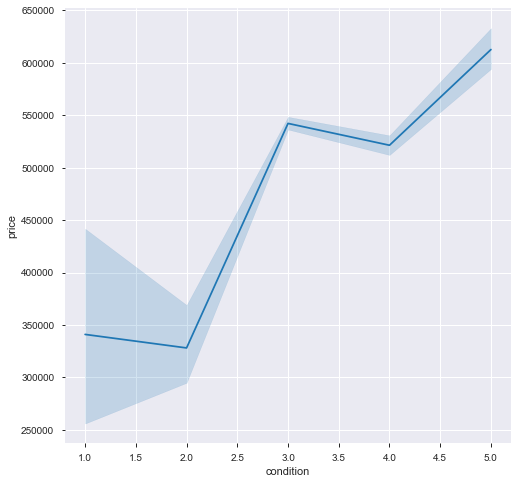

In [48]:
#comparing whether the price increases with condition
plt.figure(figsize = (8,8))
ax= sns.lineplot(df['condition'], df['price'])

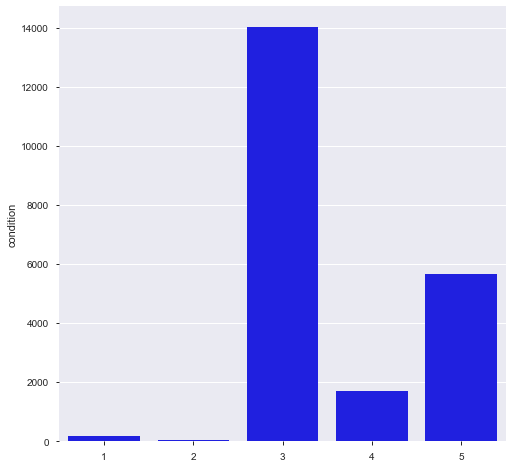

In [49]:
plt.figure(figsize = (8,8))
ax= sns.barplot(df.condition.unique(), df.condition.value_counts(), color = 'blue')

In [50]:
#due to an error in the above plot we have decide to create a pandas series based on the unique values of 
#Condition in order to plot it out correctly.
con=df['condition'].value_counts()
con

3    14018
4     5676
5     1701
2      170
1       29
Name: condition, dtype: int64

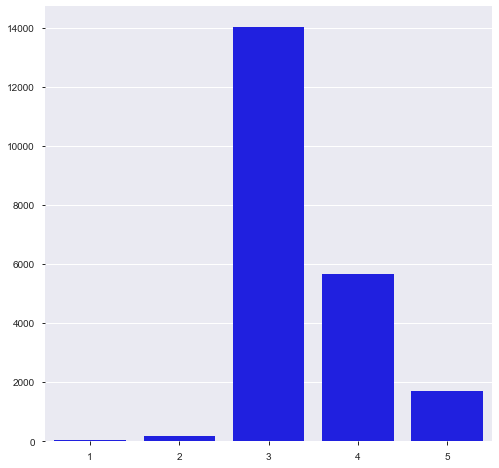

In [51]:
# here we have a correct plot based on the pandas series.

plt.figure(figsize = (8,8))
ax= sns.barplot(con.index, con.values, color = 'blue')

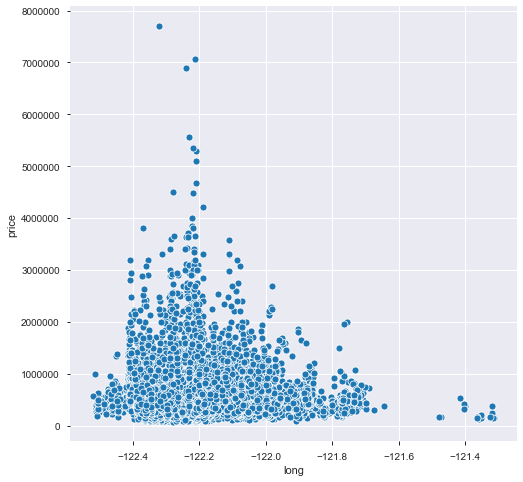

In [52]:
#Comparing price based on longitudinal location
plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['long'], df['price'])

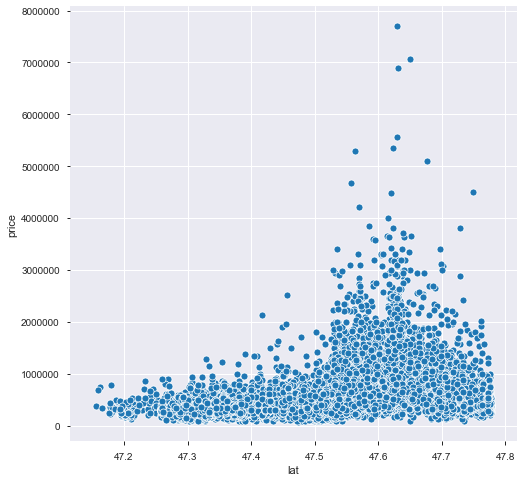

In [53]:
#comparing price based on latitudinal location

plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['lat'], df['price'])

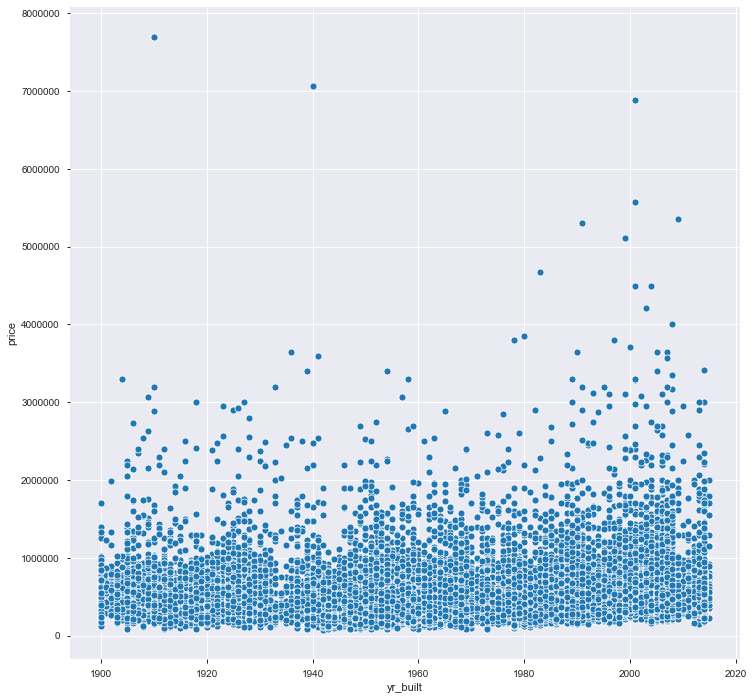

In [54]:
#checking if year built has any effect on price. 
#based on the plot below, there is no correlation.

plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['yr_built'], df['price'])

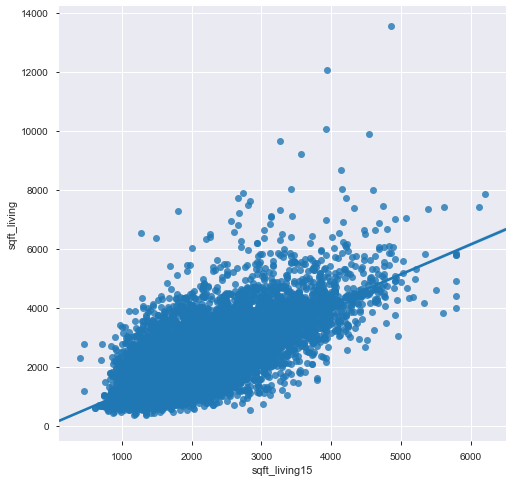

In [55]:
#when comparing the sqft_living with sqft_living15 we can see a slight correlation 

plt.figure(figsize = (8,8))
ax= sns.regplot(df['sqft_living15'], df['sqft_living'])

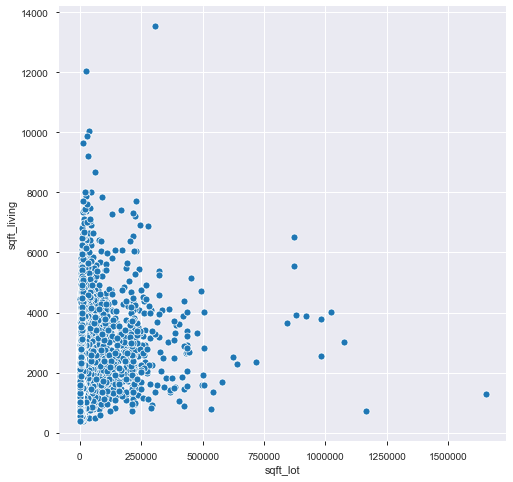

In [56]:
# plotting sqft_lot to sqft_living, however this does give an accurate indication of the size of the 
# properties as houses can be built up on several floors

plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_lot'], df['sqft_living'])

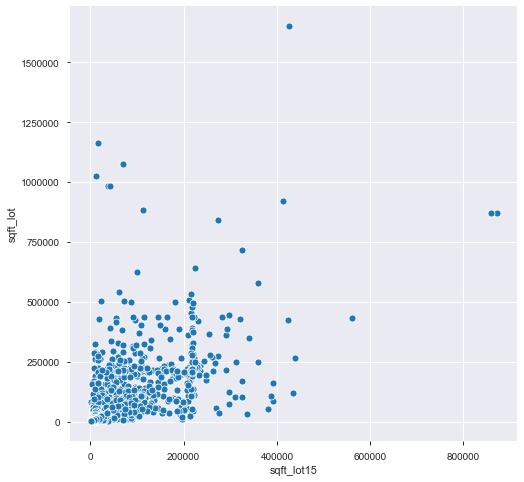

In [57]:
#checking to see if the is a direct correlation size of the lot and the neighboring property lots

plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_lot15'], df['sqft_lot'])

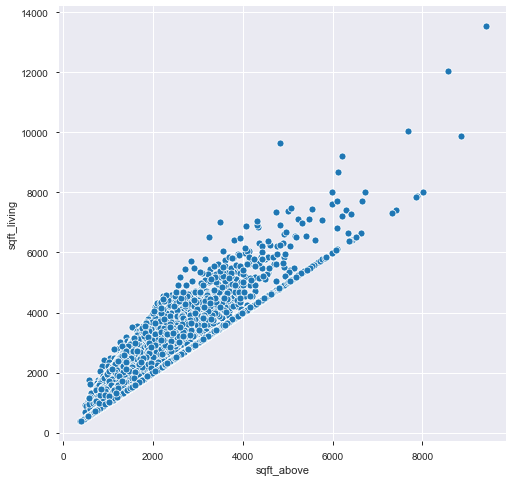

In [58]:
# There is however a stong correlation between linving space and sqft above the basement.
plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_above'], df['sqft_living'])

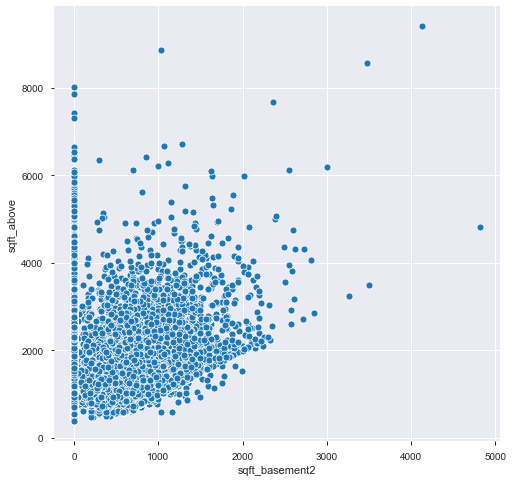

In [59]:
#there is no real correlation between the basement size and the sqft above. There fore it would dificult to 
# predict the size of the living area above the basement.

plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_basement2'], df['sqft_above'])

## Creating our subsets 

We initially sorted our dataframe in descending order of price, afterwhich we created a subset of the 2000 most expensive properties.

In [60]:
most_expensive_df = df.sort_values('price', ascending = False)

In [61]:
most_expensive_2000 = most_expensive_df.iloc[0:2000]

In [62]:
most_expensive_2000.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
7245  6762700020  10/13/2014  7700000.0         6       8.00        12050   
3910  9808700762   6/11/2014  7060000.0         5       4.50        10040   
9245  9208900037   9/19/2014  6890000.0         6       7.75         9890   
4407  2470100110    8/4/2014  5570000.0         5       5.75         9200   
1446  8907500070   4/13/2015  5350000.0         5       5.00         8000   

      sqft_lot  floors  condition  grade  ...  yr_built  yr_renovated  \
7245     27600     2.5          4     13  ...      1910        1987.0   
3910     37325     2.0          3     11  ...      1940        2001.0   
9245     31374     2.0          3     13  ...      2001           0.0   
4407     35069     2.0          3     13  ...      2001           0.0   
1446     23985     2.0          3     12  ...      2009           0.0   

      zipcode      lat     long  sqft_living15  sqft_lot15  \
7245    98102  47.6298 -122.323           3940        8800   
3910    98004  47.6500 -122.214           3930       25449   
9245    98039  47.6305 -122.240           4540       42730   
4407    98039  47.6289 -122.233           3560       24345   
1446    98004  47.6232 -122.220           4600       21750   

                         geometry sqft_basement2  basement_bool  
7245  POINT (-122.32300 47.62980)           3480           True  
3910  POINT (-122.21400 47.65000)           2360           True  
9245  POINT (-122.24000 47.63050)           1030           True  
4407  POINT (-122.23300 47.62890)           3000           True  
1446  POINT (-122.22000 47.62320)           1280           True  

[5 rows x 21 columns]

In [63]:
most_expensive_2000.tail()

id       date     price  bedrooms  bathrooms  sqft_living  \
545    2944000240  4/22/2015  910000.0         4       2.50         3350   
8371   2426059097   3/5/2015  910000.0         4       2.50         3530   
14862  1125059071  5/22/2014  910000.0         4       3.25         3340   
20665  1233100710  4/16/2015  909950.0         5       3.75         3050   
19863  8562710640  2/11/2015  909500.0         4       4.00         4420   

       sqft_lot  floors  condition  grade  ...  yr_built  yr_renovated  \
545       29242     2.0          3     11  ...      1988           0.0   
8371      49222     2.0          4      9  ...      1986           0.0   
14862     10890     1.5          3      9  ...      1963        2000.0   
20665      8972     2.0          3      9  ...      2014           0.0   
19863      5940     2.0          3     10  ...      2006           0.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  \
545      98052  47.7197 -122.131           3920       24728   
8371     98072  47.7285 -122.112           3750       49222   
14862    98052  47.6677 -122.136           2880        9794   
20665    98033  47.6819 -122.172           2750        8979   
19863    98027  47.5397 -122.072           4510        5797   

                          geometry sqft_basement2  basement_bool  
545    POINT (-122.13100 47.71970)              0           True  
8371   POINT (-122.11200 47.72850)              0           True  
14862  POINT (-122.13600 47.66770)           1100           True  
20665  POINT (-122.17200 47.68190)              0           True  
19863  POINT (-122.07200 47.53970)           1010           True  

[5 rows x 21 columns]

In [64]:
print("Of the 2,000 most expensive properties:")
print("The most expensive property value is:" , most_expensive_2000.price.max())
print("The least expensive property value is:" , most_expensive_2000.price.min())

Of the 2,000 most expensive properties:
The most expensive property value is: 7700000.0
The least expensive property value is: 909500.0


In [70]:
#Creating the geopandas dataframe inorder to map out our most expensive properties on a map

index_list=list(most_expensive_2000.index.values)

In [71]:
len(index_list)

2000

In [72]:
me2000_geo_df = geo_df[geo_df.index.map(lambda x: x in index_list)]

In [73]:
me2000_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2000 entries, 5 to 21590
Data columns (total 21 columns):
id               2000 non-null int64
date             2000 non-null object
price            2000 non-null float64
bedrooms         2000 non-null int64
bathrooms        2000 non-null float64
sqft_living      2000 non-null int64
sqft_lot         2000 non-null int64
floors           2000 non-null float64
waterfront       1795 non-null float64
condition        2000 non-null int64
grade            2000 non-null int64
sqft_above       2000 non-null int64
sqft_basement    2000 non-null object
yr_built         2000 non-null int64
yr_renovated     1646 non-null float64
zipcode          2000 non-null int64
lat              2000 non-null float64
long             2000 non-null float64
sqft_living15    2000 non-null int64
sqft_lot15       2000 non-null int64
geometry         2000 non-null geometry
dtypes: float64(7), geometry(1), int64(11), object(2)
memory usage: 343.8+ KB


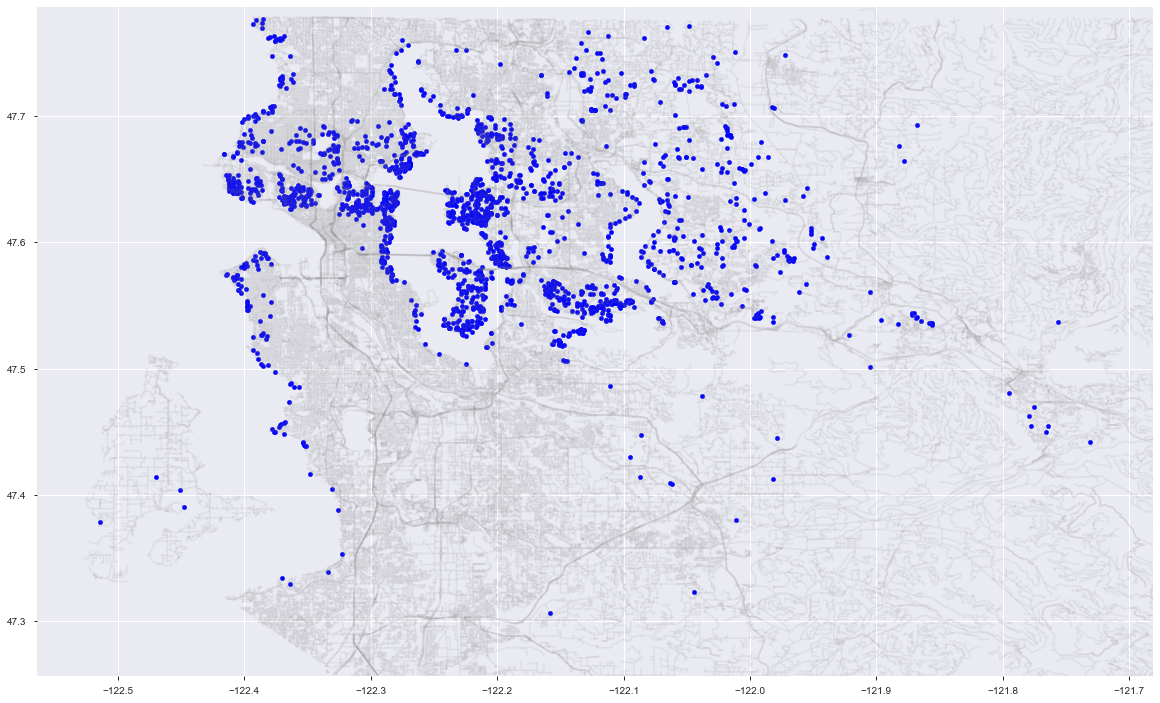

In [74]:
# by mapping the location of our most expensive properties we can see that there are a few clusters, also the 
# vast majority are along or near the waterfront.

fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax =ax, alpha = 0.1, color = "grey")
me2000_geo_df.plot(ax=ax, markersize = 20, color='blue')
minx, miny, maxx, maxy = me2000_geo_df.total_bounds
ax.set_xlim(minx-0.05, maxx+0.05)
ax.set_ylim(miny-0.05, maxy+0.01)
plt.savefig('most_expensive_2000.png')

In [75]:
#checking to see if the are popular zipcodes among the 2000 most expensive properties. zipcode 98004 has roughly 10% 
# of the most expensive properties in it.

most_expensive_2000['zipcode'].value_counts().head(10)

98004    216
98040    173
98006    161
98112    136
98033    106
98199     84
98105     71
98075     66
98115     56
98053     52
Name: zipcode, dtype: int64

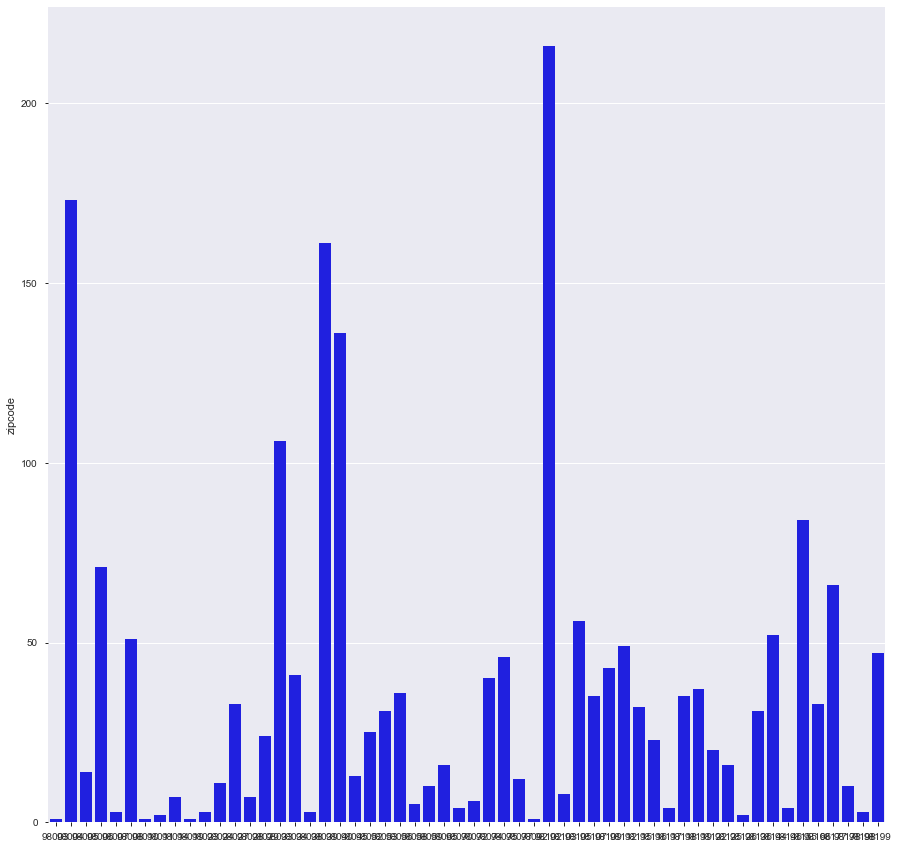

In [76]:
# Plotting our most expensive properties to zipcodes to see if there are any zipcodes that a high concentration of 
# properties. 

# however looking at the results, even though there are a few zipcode that have quite a few of the most expensive
# they are spread out.

plt.figure(figsize = (15,15))
ax = sns.barplot(most_expensive_2000['zipcode'].unique(), most_expensive_2000['zipcode'].value_counts(), color = 'blue')

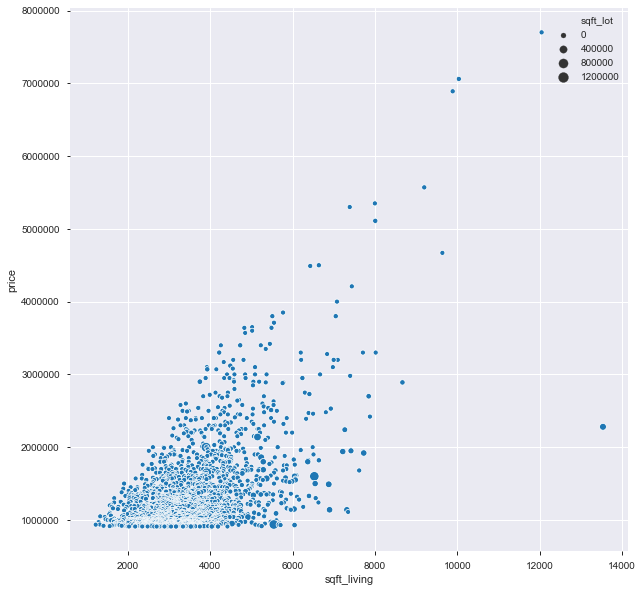

In [77]:
# Comparing sqft_living and price and lot size.
# There is no direct 
plt.figure(figsize = (10,10))
ax= sns.scatterplot(most_expensive_2000['sqft_living'], most_expensive_2000['price'], size = most_expensive_2000['sqft_lot'])

In [78]:
#We are subtracting the 2000 most expensive properties from the main dataframe in order to create a sample set
df_minus2000 = df.drop(most_expensive_2000.index, axis=0)
df_minus2000.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  condition  grade  ...  yr_built  yr_renovated  zipcode  \
0      5650     1.0          3      7  ...      1955           0.0    98178   
1      7242     2.0          3      7  ...      1951        1991.0    98125   
2     10000     1.0          3      6  ...      1933           0.0    98028   
3      5000     1.0          5      7  ...      1965           0.0    98136   
4      8080     1.0          3      8  ...      1987           0.0    98074   

       lat     long  sqft_living15  sqft_lot15                     geometry  \
0  47.5112 -122.257           1340        5650  POINT (-122.25700 47.51120)   
1  47.7210 -122.319           1690        7639  POINT (-122.31900 47.72100)   
2  47.7379 -122.233           2720        8062  POINT (-122.23300 47.73790)   
3  47.5208 -122.393           1360        5000  POINT (-122.39300 47.52080)   
4  47.6168 -122.045           1800        7503  POINT (-122.04500 47.61680)   

  sqft_basement2  basement_bool  
0              0           True  
1            400           True  
2              0           True  
3            910           True  
4              0           True  

[5 rows x 21 columns]

In [79]:
df_sample2000 = df_minus2000.sample(n=2000, random_state = 6)
df_sample2000

id        date     price  bedrooms  bathrooms  sqft_living  \
16742  2770601763   3/23/2015  450000.0         3       3.50         1790   
3233   7660600131  10/20/2014  374950.0         2       2.25         1240   
3896   6821102352   10/8/2014  330000.0         2       1.00          880   
10080  4319200060    7/9/2014  840000.0         3       2.00         2783   
7803   1529300115    6/2/2014  455000.0         2       1.00         1170   
...           ...         ...       ...       ...        ...          ...   
11489  1453600681   2/23/2015  328500.0         3       2.25         1390   
9142   2322069175   2/24/2015  319502.0         3       1.75         1610   
16082  3226049530   1/22/2015  465000.0         5       3.00         2010   
20467     7600065    6/5/2014  465000.0         3       2.25         1530   
4859    629500170   3/26/2015  679950.0         4       2.50         2850   

       sqft_lot  floors  condition  grade  ...  yr_built  yr_renovated  \
16742      1288     3.0          3      8  ...      2000           0.0   
3233       1172     2.0          3      8  ...      2008           0.0   
3896       1753     2.0          4      7  ...      1945           0.0   
10080     11177     2.0          3      8  ...      1910        1999.0   
7803       6000     1.0          4      7  ...      1941           0.0   
...         ...     ...        ...    ...  ...       ...           ...   
11489      1407     3.0          3      7  ...      2004           0.0   
9142      38707     1.0          3      7  ...      1990           0.0   
16082      7264     1.0          3      7  ...      1990           0.0   
20467      1245     2.0          3      9  ...      2014           0.0   
4859       5664     2.0          3      9  ...      2001           0.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  \
16742    98199  47.6510 -122.384           1560        1426   
3233     98144  47.5877 -122.316           1260        1111   
3896     98199  47.6475 -122.397           1010        1748   
10080    98126  47.5380 -122.380           1730        8018   
7803     98103  47.6994 -122.354           2130        6002   
...        ...      ...      ...            ...         ...   
11489    98125  47.7227 -122.296           1390        1628   
9142     98010  47.3778 -122.001           1930       45151   
16082    98103  47.6945 -122.330           1510        7326   
20467    98122  47.6018 -122.297           1530        2307   
4859     98075  47.5835 -121.996           2850        5475   

                          geometry sqft_basement2  basement_bool  
16742  POINT (-122.38400 47.65100)            400           True  
3233   POINT (-122.31600 47.58770)            240           True  
3896   POINT (-122.39700 47.64750)              0           True  
10080  POINT (-122.38000 47.53800)              0           True  
7803   POINT (-122.35400 47.69940)            200           True  
...                            ...            ...            ...  
11489  POINT (-122.29600 47.72270)              0           True  
9142   POINT (-122.00100 47.37780)              0           True  
16082  POINT (-122.33000 47.69450)            720           True  
20467  POINT (-122.29700 47.60180)            480           True  
4859   POINT (-121.99600 47.58350)              0           True  

[2000 rows x 21 columns]

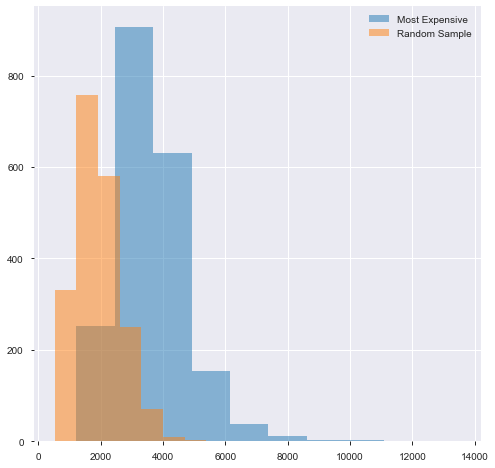

In [80]:
#comparing sqft_living of the most expensive properties and the random sample. Clearly the most expensive properties 
# a larger living areas even though there is a slight overlap.

plt.figure(figsize = (8,8))
ax= plt.hist(most_expensive_2000['sqft_living'], alpha = 0.5, label = 'Most Expensive')
ax2 = plt.hist(df_sample2000['sqft_living'], alpha = 0.5, label = 'Random Sample')
plt.legend()

In [81]:


list_beds1=list(most_expensive_2000.bedrooms.value_counts())
list_beds2=list(df_sample2000.bedrooms.value_counts())

In [82]:
# comparing the two data sets based on the number of bedrooms

# The mode number of bedroom of the most expensive properties is 4 

me_beds = most_expensive_2000.bedrooms.value_counts()
me_beds

4     1013
3      451
5      405
6       64
2       47
7       11
8        4
9        3
10       1
1        1
Name: bedrooms, dtype: int64

In [83]:
# The mode number of bedroom of the most expensive properties is 3

sample_beds = df_sample2000.bedrooms.value_counts()
sample_beds

3    977
4    590
2    283
5    112
1     19
6     15
7      4
Name: bedrooms, dtype: int64

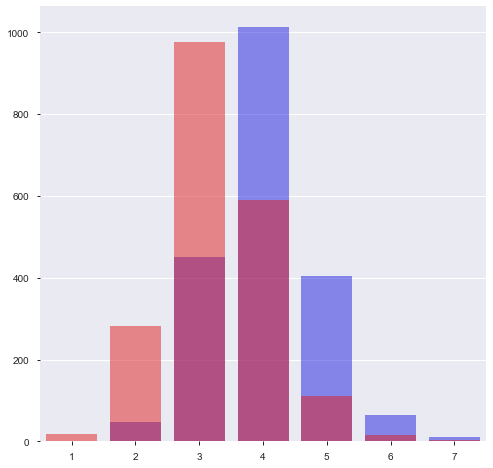

In [84]:
#There are actually more 3 bedrooms in our sample set then there are in our most expensive properties 

plt.figure(figsize = (8,8))
ax= sns.barplot(me_beds.index.values, me_beds.values, color = 'blue', alpha = 0.5)
ax2 = sns.barplot(sample_beds.index.values, sample_beds.values, color = 'red', alpha = 0.5)

In [85]:
print("The mean number of bedroom in the most expensive properties is:", most_expensive_2000.bedrooms.mean())
print("The mean number of bedrooms in the sample is: ", df_sample2000.bedrooms.mean())

The mean number of bedroom in the most expensive properties is: 4.0275
The mean number of bedrooms in the sample is:  3.277


In [86]:
most_expensive_2000.bedrooms.unique()

array([ 6,  5,  4,  3,  8,  2,  7,  9,  1, 10])

In [87]:
#grouping the sample sets by number rooms in order to get the mean values for comparitive reasons
me_bed_mean = most_expensive_2000.groupby('bedrooms').mean()

In [88]:
me_bed_mean

id         price  bathrooms  sqft_living      sqft_lot  \
bedrooms                                                                     
1         7.240690e+08  1.250000e+06   1.250000  1810.000000   5070.000000   
2         4.799409e+09  1.245184e+06   2.250000  2549.148936  35501.382979   
3         4.159571e+09  1.285904e+06   2.578714  2992.394678  18063.447894   
4         4.202839e+09  1.343951e+06   3.074778  3646.013820  26864.127345   
5         4.336820e+09  1.522837e+06   3.465432  4111.355556  19083.222222   
6         4.119156e+09  1.712451e+06   3.824219  4663.359375  26076.765625   
7         3.596196e+09  1.853182e+06   4.386364  5632.727273  43017.636364   
8         1.255600e+09  2.267500e+06   4.062500  5132.500000  12077.750000   
9         9.156834e+09  1.204667e+06   3.833333  3696.666667   4996.000000   
10        6.273001e+08  1.150000e+06   5.250000  4590.000000  10920.000000   

            floors  condition      grade   sqft_above     yr_built  \
bedrooms                                                             
1         1.500000   4.000000   8.000000  1230.000000  1967.000000   
2         1.765957   3.531915   9.000000  2094.255319  1970.787234   
3         1.684035   3.490022   9.126386  2442.949002  1966.858093   
4         1.815400   3.468904   9.688055  3086.842053  1976.626851   
5         1.834568   3.419753   9.770370  3350.960494  1979.318519   
6         1.968750   3.531250   9.796875  3549.140625  1965.718750   
7         2.090909   3.363636  10.181818  4400.000000  1972.636364   
8         2.125000   4.250000   9.750000  3897.500000  1948.000000   
9         2.166667   3.000000   8.666667  2760.000000  1916.000000   
10        1.000000   3.000000   9.000000  2500.000000  2008.000000   

          yr_renovated       zipcode        lat        long  sqft_living15  \
bedrooms                                                                     
1             0.000000  98075.000000  47.581400 -122.081000    2280.000000   
2           211.659574  98088.808511  47.613419 -122.241000    2525.297872   
3           212.778271  98083.922395  47.621609 -122.258847    2731.148559   
4           161.853899  98066.036525  47.616766 -122.205117    3034.893386   
5           163.088889  98060.288889  47.616516 -122.203099    3114.444444   
6           249.296875  98078.406250  47.618241 -122.240625    3117.890625   
7           364.363636  98051.727273  47.617627 -122.194273    3304.545455   
8             0.000000  98058.000000  47.630725 -122.260000    3592.500000   
9           670.000000  98105.000000  47.664733 -122.301667    2560.000000   
10            0.000000  98004.000000  47.586100 -122.113000    2730.000000   

            sqft_lot15  sqft_basement2  basement_bool  
bedrooms                                               
1          5070.000000      580.000000       1.000000  
2         22248.893617      454.893617       0.957447  
3         13842.017738      549.445676       0.984479  
4         19919.999013      559.171767       0.979269  
5         15476.743210      760.395062       0.980247  
6         20157.000000     1114.218750       1.000000  
7         29857.090909     1232.727273       1.000000  
8         11641.250000     1235.000000       1.000000  
9          4573.333333      936.666667       1.000000  
10        10400.000000     2090.000000       1.000000

In [89]:
df_sample_bed_mean = df_sample2000.groupby('bedrooms').mean()

In [90]:
df_sample_bed_mean

id          price  bathrooms  sqft_living      sqft_lot  \
bedrooms                                                                      
1         3.759563e+09  357965.789474   1.263158  1071.052632  10471.526316   
2         4.611749e+09  382541.763251   1.390459  1225.388693   8382.925795   
3         4.595817e+09  427818.469806   1.931679  1763.151484  13938.166837   
4         4.635289e+09  523278.437288   2.339831  2374.323729  15289.900000   
5         4.091403e+09  511934.392857   2.502232  2603.821429  13514.910714   
6         4.603790e+09  560886.666667   2.666667  2710.000000   8381.333333   
7         5.302676e+09  699975.000000   4.187500  4717.500000  16275.000000   

            floors  condition     grade   sqft_above     yr_built  \
bedrooms                                                            
1         1.342105   3.315789  6.578947   954.210526  1942.894737   
2         1.303887   3.431095  6.812721  1105.671378  1954.166078   
3         1.448311   3.427840  7.419652  1558.383828  1971.676561   
4         1.598305   3.366102  7.884746  2071.069492  1977.383051   
5         1.401786   3.446429  7.660714  1987.214286  1971.696429   
6         1.466667   3.466667  7.466667  2031.333333  1957.333333   
7         1.625000   3.000000  8.500000  3700.000000  1961.500000   

          yr_renovated       zipcode        lat        long  sqft_living15  \
bedrooms                                                                     
1           312.368421  98099.263158  47.556453 -122.219789    1497.368421   
2            63.296820  98107.003534  47.590833 -122.278032    1489.473498   
3            69.498465  98076.000000  47.547429 -122.212832    1784.330604   
4            60.823729  98070.967797  47.551466 -122.182463    2181.383051   
5            35.562500  98073.633929  47.561235 -122.216670    2123.607143   
6           263.933333  98078.266667  47.549440 -122.253600    1930.666667   
7             0.000000  98130.750000  47.545750 -122.314000    2157.500000   

            sqft_lot15  sqft_basement2  basement_bool  
bedrooms                                               
1         11754.894737      116.842105       0.947368  
2          7132.932862      119.717314       0.978799  
3         12954.797339      204.767656       0.983623  
4         13637.374576      303.254237       0.984746  
5         11064.035714      616.607143       0.955357  
6          7296.733333      678.666667       1.000000  
7         13866.500000     1017.500000       1.000000

In [103]:
me_beds_sr = most_expensive_2000.bedrooms.value_counts()
sample_beds_sr = df_sample2000.bedrooms.value_counts()

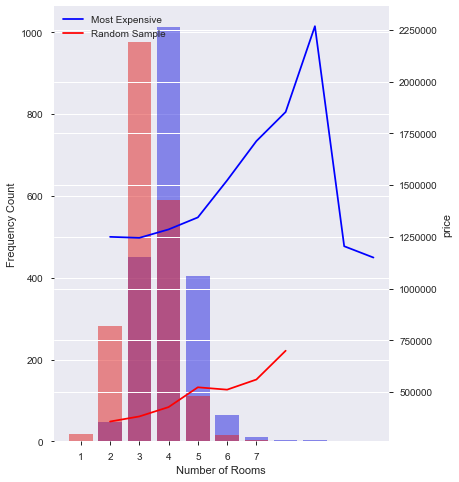

In [312]:
# comparing the number of bedrooms and price. we can see a clear difference in starting prices for 2 bedroom properties
# how ever we can see that the price drops drastically at 9 rooms for the most expensive properties.
plt.figure(figsize = (6,8))
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency Count')
ax= sns.barplot(me_beds_sr.index.values, me_beds_sr.values, color = 'blue', alpha = 0.5, label = 'Most Expensive')
ax2 = sns.barplot(sample_beds_sr.index.values, sample_beds_sr.values, color = 'red', alpha = 0.5, label = 'Random Sample')
ax3 = plt.twinx()
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['price'],color='blue', alpha = 1, label = 'Most Expensive' )
ax4= sns.lineplot(df_sample_bed_mean.index.values, df_sample_bed_mean['price'],color='red', alpha = 1, label = 'Random Sample')
plt.legend()

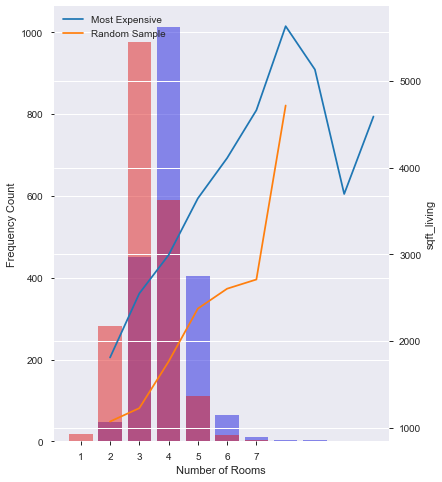

In [314]:
# comparing the number of bedrooms and sqft_living. here too we can see a clear difference in starting sqaure footage
# for 2 bedroom properties. 

# from this char we can understand why the price drops drastically at 9 rooms for the most expensive properties as 
# as the sqft_ving drastically drops as well

plt.figure(figsize = (6,8))
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency Count')
ax= sns.barplot(me_beds_sr.index.values, me_beds_sr.values, color = 'blue', alpha = 0.5,label = 'Most Expensive')
ax2 = sns.barplot(sample_beds_sr.index.values, sample_beds_sr.values, color = 'red', alpha = 0.5, label = 'Random Sample')
ax3 = plt.twinx()
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_living'], alpha = 1, label = 'Most Expensive')
ax4= sns.lineplot(df_sample_bed_mean.index.values, df_sample_bed_mean['sqft_living'], alpha = 1, label = 'Random Sample')
plt.legend()
plt.savefig('NoRooms_sqftLiving.png')

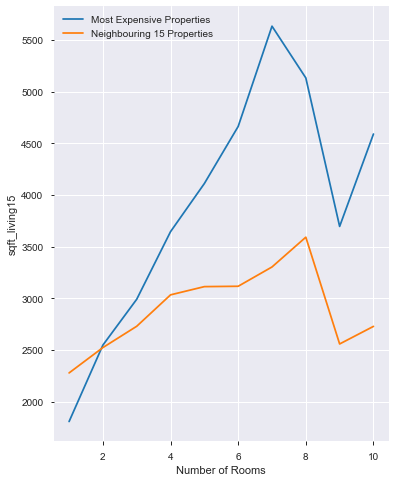

In [315]:
# the mean sqft_living for the number of bedrooms in comparison to the mean sqft_living for the neighbouring properties 
# we can see that the most expensive properties are generally larger than their neighbouring properties based 
# on the number of bedrooms

plt.figure(figsize = (6,8))
plt.xlabel('Number of Rooms')
plt.ylabel('Sqft Living')
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_living'], alpha = 1,label = 'Most Expensive Properties')
ax4= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_living15'], alpha = 1, label = 'Neighbouring 15 Properties')
plt.savefig('NoRooms_sqftLiving15')

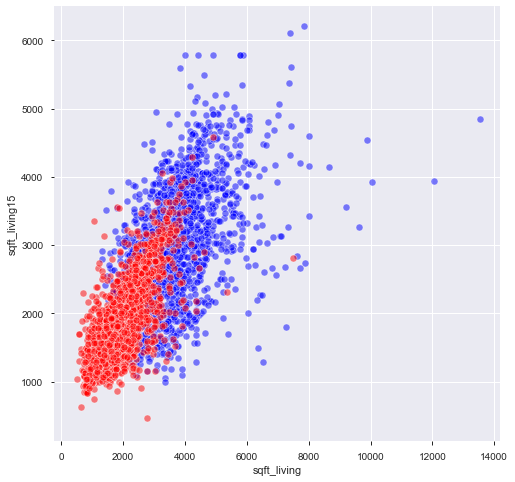

In [140]:
# by ploting all the data point for both subsets we can get a deeper look into how sqft_living and 
# sqft_liiving15 correlate 
plt.figure(figsize = (8,8))
ax = sns.scatterplot(most_expensive_2000['sqft_living'],most_expensive_2000['sqft_living15'], alpha =0.5, color = "blue")
ax2 = sns.scatterplot(df_sample2000['sqft_living'],df_sample2000['sqft_living15'], alpha = 0.5, color = 'red')

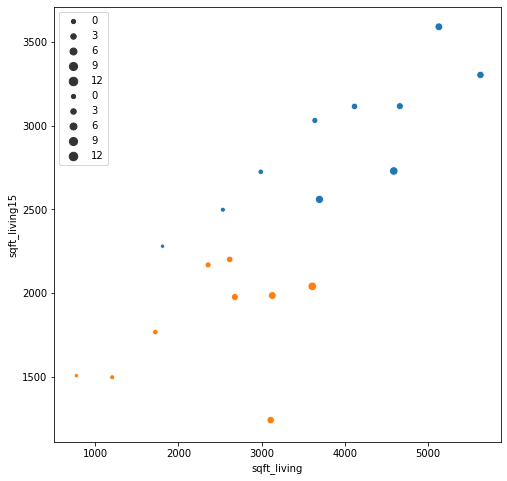

In [127]:
# We can see that there is a greater correlation between the mean sqft_living at the sqft_living15 of the most
#expensive properties than the random sample 
plt.figure(figsize = (8,8))
ax = sns.scatterplot(me_bed_mean['sqft_living'],me_bed_mean['sqft_living15'], size = me_bed_mean.index.values)
ax2 = sns.scatterplot(df_sample_bed_mean['sqft_living'],df_sample_bed_mean['sqft_living15'], size = df_sample_bed_mean.index.values)

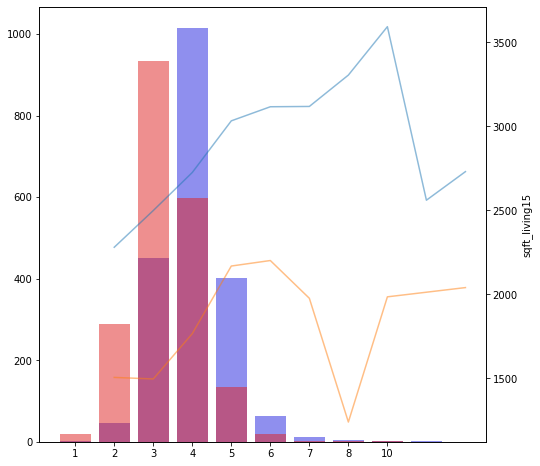

In [144]:
#Plotted this graph to see the correlation between the number of bedrooms and sqft_living15.
# Graph shows for the most expensive properties, the neighbouring properties also increase in size till 8 bedrooms 
# While the random sample neighbouring properties begin to shrink after 6 bedrooms
plt.figure(figsize = (8,8))
ax= sns.barplot(me_beds.index.values, me_beds.values, color = 'blue', alpha = 0.5)
ax2 = sns.barplot(sample_beds.index.values, sample_beds.values, color = 'red', alpha = 0.5)
ax3 = plt.twinx()
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_living15'], alpha = 0.5)
ax4= sns.lineplot(df_sample_bed_mean.index.values, df_sample_bed_mean['sqft_living15'], alpha = 0.5)

In [111]:
#Creating the geo_plots for the randon sample 
index_list2=list(df_sample2000.index.values)

In [112]:
sample2000_geo_df = geo_df[geo_df.index.map(lambda x: x in index_list2)]

In [113]:
sample2000_geo_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
8   2414600126   4/15/2015  229500.0         3        1.0         1780   
11  9212900260   5/27/2014  468000.0         2        1.0         1160   
17  6865200140   5/29/2014  485000.0         4        1.0         1600   
19  7983200060   4/24/2015  230000.0         3        1.0         1250   
30  8562750320  11/10/2014  580500.0         3        2.5         2320   

    sqft_lot  floors  waterfront  condition  ...  sqft_above  sqft_basement  \
8       7470     1.0         0.0          3  ...        1050          730.0   
11      6000     1.0         0.0          4  ...         860          300.0   
17      4300     1.5         0.0          4  ...        1600            0.0   
19      9774     1.0         0.0          4  ...        1250            0.0   
30      3980     2.0         0.0          3  ...        2320            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
8      1960           0.0    98146  47.5123 -122.337           1780   
11     1942           0.0    98115  47.6900 -122.292           1330   
17     1916           0.0    98103  47.6648 -122.343           1610   
19     1969           0.0    98003  47.3343 -122.306           1280   
30     2003           0.0    98027  47.5391 -122.070           2580   

    sqft_lot15                     geometry  
8         8113  POINT (-122.33700 47.51230)  
11        6000  POINT (-122.29200 47.69000)  
17        4300  POINT (-122.34300 47.66480)  
19        8850  POINT (-122.30600 47.33430)  
30        3980  POINT (-122.07000 47.53910)  

[5 rows x 21 columns]

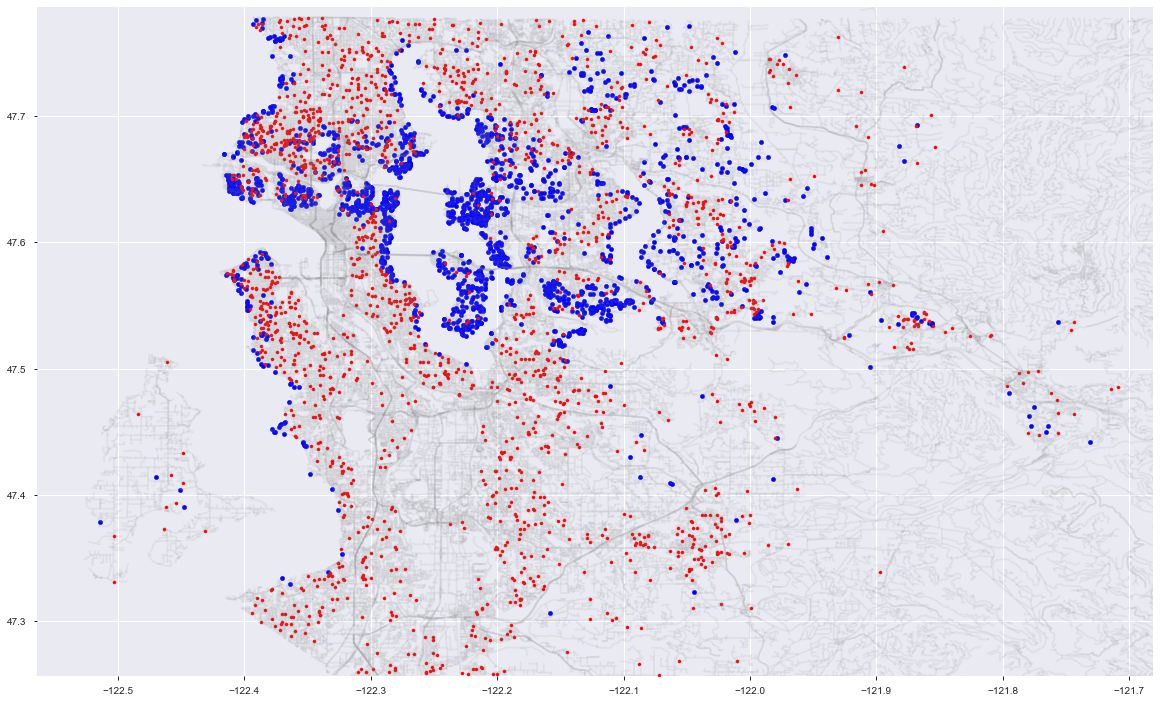

In [115]:
# The geo_plot shows the most expensive properties mapped in blue dots and the random sample properties
# mapped in red dots. 

# We can see that that vast majjority of the random sample are more inland than the most expensive properties

fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax =ax, alpha = 0.1, color = "grey")
me2000_geo_df.plot(ax=ax, markersize = 20, color='blue')
sample2000_geo_df.plot(ax=ax, markersize = 10, color='red')
minx, miny, maxx, maxy = me2000_geo_df.total_bounds
ax.set_xlim(minx-0.05, maxx+0.05)
ax.set_ylim(miny-0.05, maxy+0.01)
plt.savefig('me2000andsample2000.png')

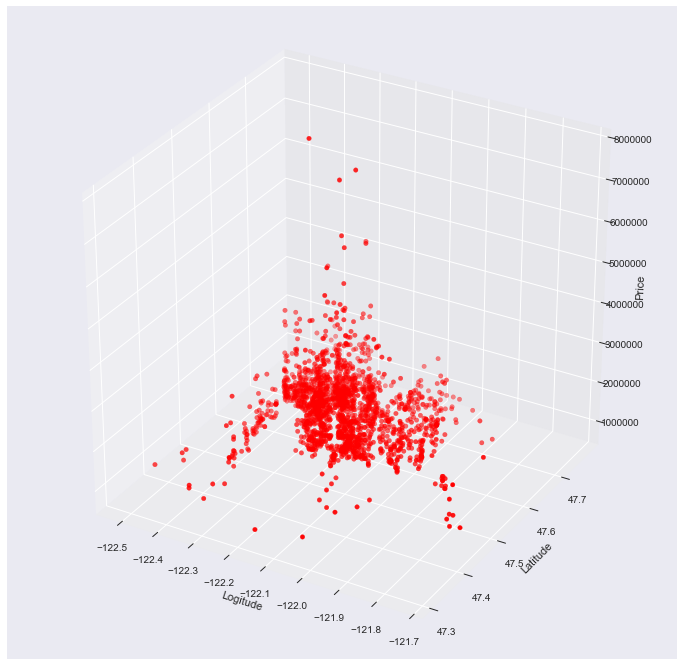

In [323]:
#  Creating a 3d Scatter plot of the most expensive properties based on longitude and latitude and price
#  we can see that the is a large cluster of properties in between -122.4 & -122.1 and between 47.5 and 47.7

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(most_expensive_2000['long'],most_expensive_2000['lat'] , most_expensive_2000['price'], c='r', marker='o')

ax.set_xlabel('Logitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Price')

plt.savefig('3dPrice.png')

plt.show()

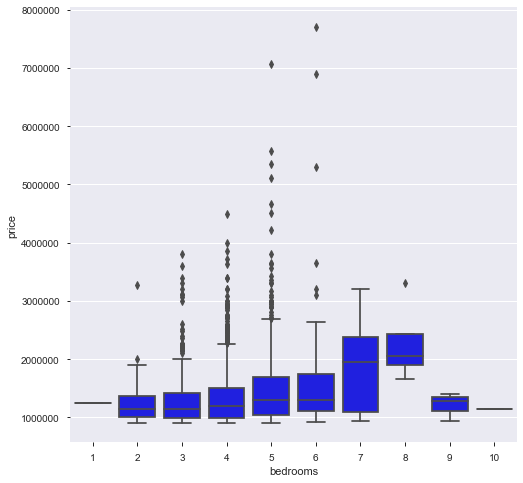

In [228]:
# The following box plots below show how the price change as the number of rooms increases

ax=plt.figure(figsize = (8,8))
ax= sns.boxplot(most_expensive_2000['bedrooms'], most_expensive_2000['price'], color = 'blue')


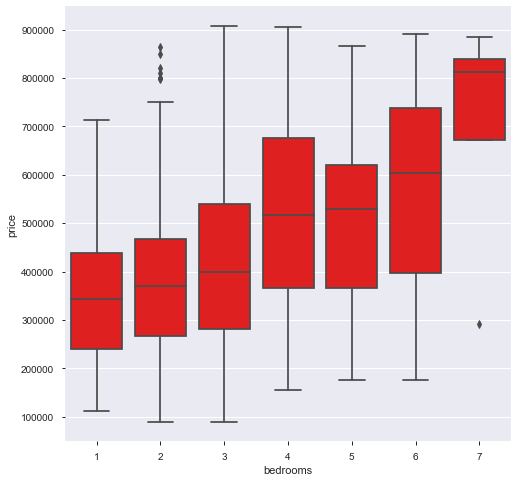

In [230]:
ax=plt.figure(figsize = (8,8))
ax= sns.boxplot(df_sample2000['bedrooms'], df_sample2000['price'], color= 'red')

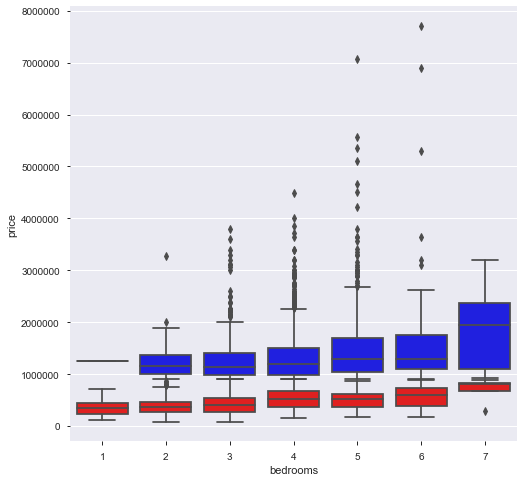

In [227]:
# When comparing the two previous boxplots we can see that while there is a slight over lap in prices the vast 
# majority of the most expensive properties are substantially more expensive based on the number of rooms

ax=plt.figure(figsize = (8,8))
ax= sns.boxplot(most_expensive_2000['bedrooms'], most_expensive_2000['price'], color = 'blue')
ax2= sns.boxplot(df_sample2000['bedrooms'], df_sample2000['price'], color= 'red')

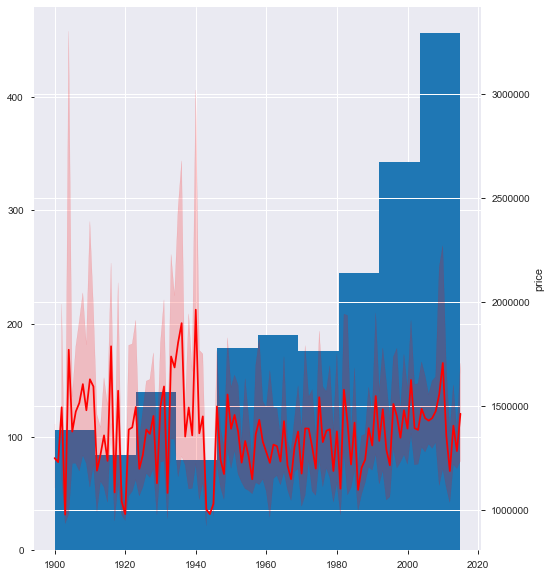

In [326]:
plt.figure(figsize = (8,10))
ax= plt.hist(most_expensive_2000['yr_built'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(most_expensive_2000['yr_built'], most_expensive_2000['price'],color='red', alpha = 1 )
plt.savefig('YrBuiltPrice.png')

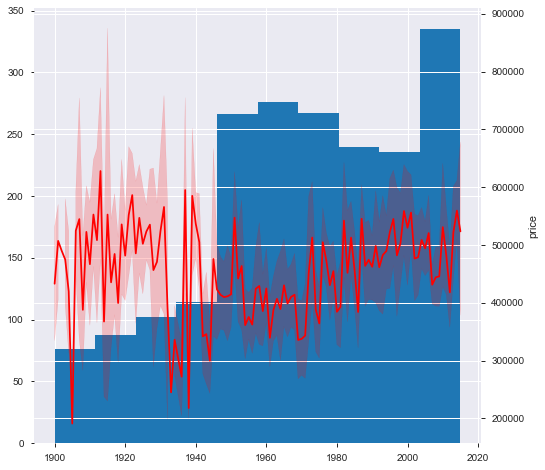

In [120]:
plt.figure(figsize = (8,8))
ax= plt.hist(df_sample2000['yr_built'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(df_sample2000['yr_built'], df_sample2000['price'],color='red', alpha = 1) 

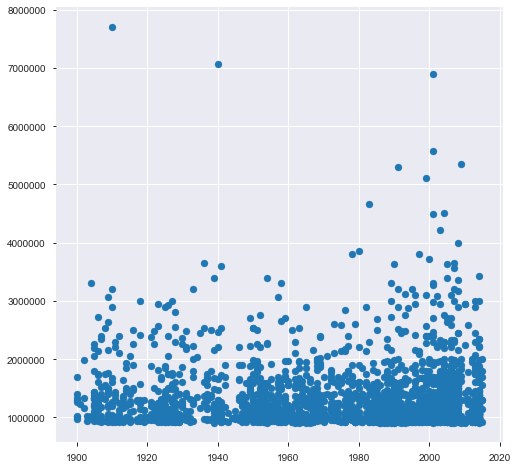

In [121]:
plt.figure(figsize = (8,8))
ax= plt.scatter(me2000_geo_df['yr_built'],me2000_geo_df['price'],alpha = 1, label = 'Most Expensive')

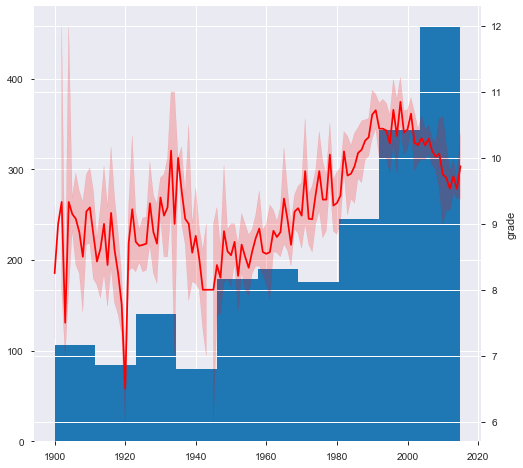

In [325]:
plt.figure(figsize = (8,8))
ax= plt.hist(most_expensive_2000['yr_built'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(most_expensive_2000['yr_built'], most_expensive_2000['grade'],color='red', alpha = 1 )

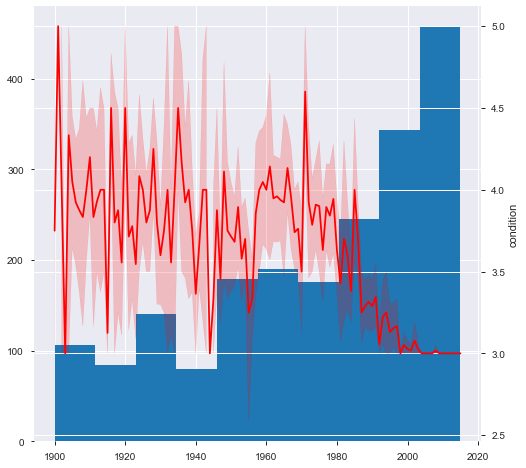

In [123]:
plt.figure(figsize = (8,8))
ax= plt.hist(me2000_geo_df['yr_built'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(me2000_geo_df['yr_built'], me2000_geo_df['condition'],color='red', alpha = 1 )

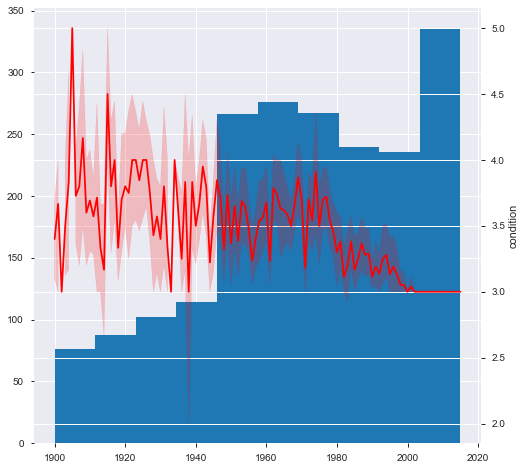

In [124]:
plt.figure(figsize = (8,8))
ax= plt.hist(df_sample2000['yr_built'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(df_sample2000['yr_built'], df_sample2000['condition'],color='red', alpha = 1) 

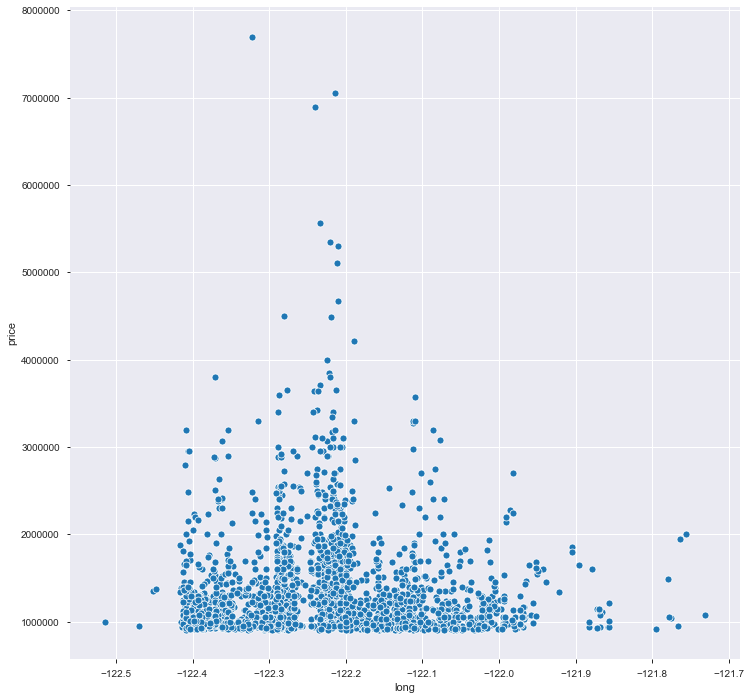

In [125]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(me2000_geo_df['long'], me2000_geo_df['price'])

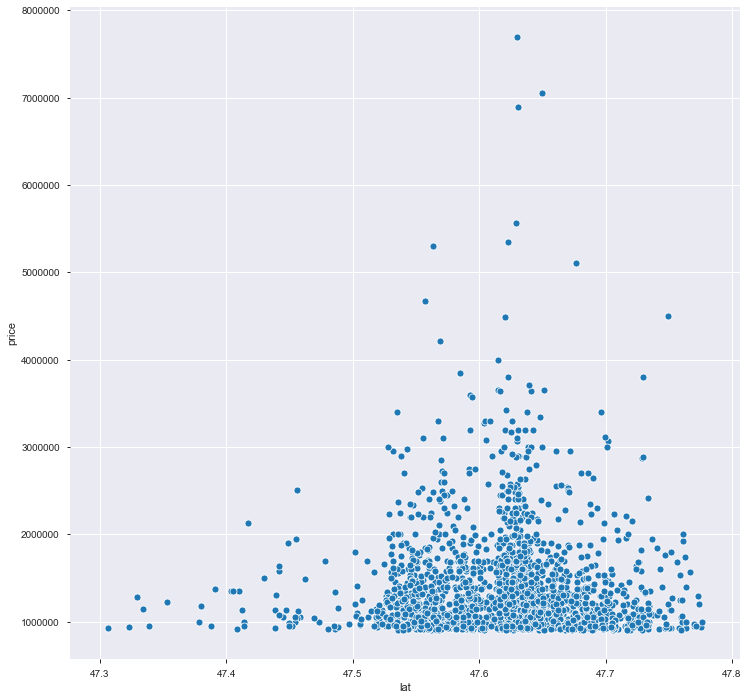

In [126]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(me2000_geo_df['lat'], me2000_geo_df['price'])

In [129]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [130]:
f = 'sqft_above~yr_built'
model = ols(f, data = me2000_geo_df).fit()

In [131]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqft_above   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     486.0
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           1.39e-96
Time:                        09:09:54   Log-Likelihood:                -16609.
No. Observations:                2000   AIC:                         3.322e+04
Df Residuals:                    1998   BIC:                         3.323e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.639e+04   1333.123    -19.797      0.000    -2.9e+04   -2.38e+04
yr_built      14.8838      0.675     22.046      0.000      13.560      16.208
==============================================================================
Omnibus:                      470.436   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1467.799
Skew:                           1.177   Prob(JB):                         0.00
Kurtosis:                       6.475   Cond. No.                     1.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

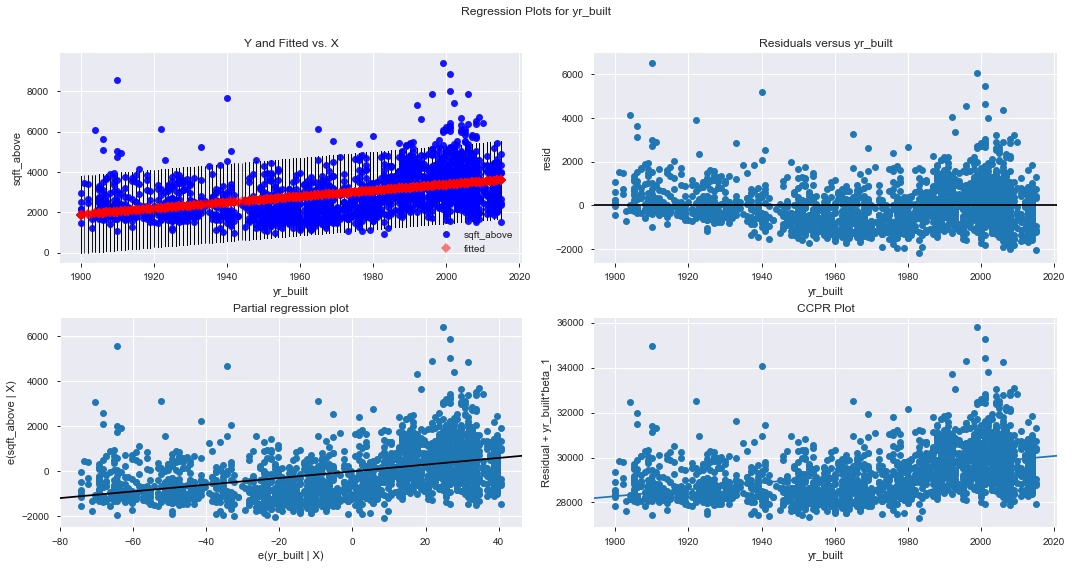

In [132]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "yr_built", fig=fig)
plt.show()

In [133]:
sqftliving = 'sqft_living15~sqft_living'
model = ols(sqftliving, data = me2000_geo_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqft_living15   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     667.7
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          2.91e-127
Time:                        09:09:59   Log-Likelihood:                -16014.
No. Observations:                2000   AIC:                         3.203e+04
Df Residuals:                    1998   BIC:                         3.204e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1649.4435     53.796     30.661      0.000    1543.942    1754.946
sqft_living     0.3667      0.014     25.840      0.000       0.339       0.395
==============================================================================
Omnibus:                        2.546   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                2.539
Skew:                          -0.049   Prob(JB):                        0.281
Kurtosis:                       3.144   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

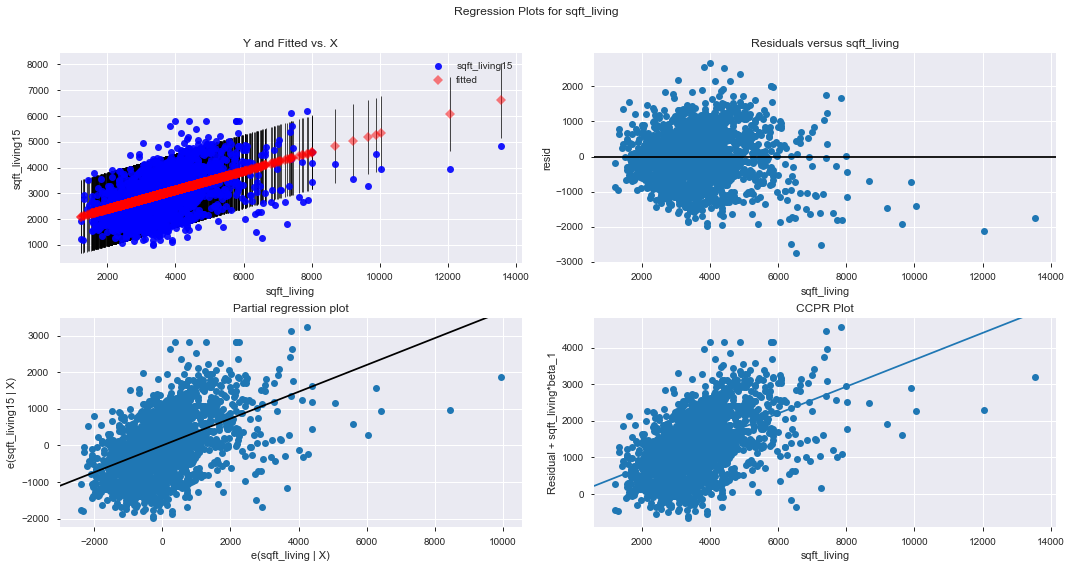

In [134]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [135]:
sqftliving_sample = 'sqft_living15~sqft_living'
model = ols(sqftliving_sample, data = df_sample2000).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqft_living15   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     2387.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:10:04   Log-Likelihood:                -14784.
No. Observations:                2000   AIC:                         2.957e+04
Df Residuals:                    1998   BIC:                         2.958e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     742.8545     24.837     29.909      0.000     694.145     791.564
sqft_living     0.5909      0.012     48.856      0.000       0.567       0.615
==============================================================================
Omnibus:                      104.029   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.396
Skew:                          -0.022   Prob(JB):                     2.05e-84
Kurtosis:                       5.150   Cond. No.                     5.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

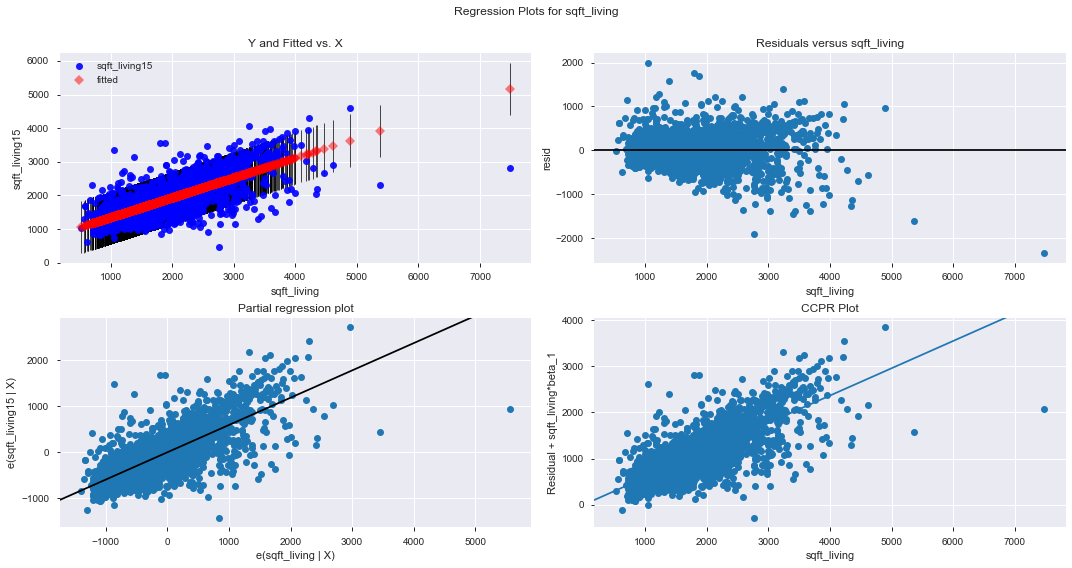

In [136]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [169]:
sqftprice = 'sqft_living~price'
model = ols(sqftprice, data = most_expensive_2000).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     953.8
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          1.50e-171
Time:                        09:21:58   Log-Likelihood:                -16534.
No. Observations:                2000   AIC:                         3.307e+04
Df Residuals:                    1998   BIC:                         3.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2106.7081     53.138     39.646      0.000    2002.496    2210.920
price          0.0011   3.53e-05     30.883      0.000       0.001       0.001
==============================================================================
Omnibus:                      466.824   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2077.323
Skew:                           1.050   Prob(JB):                         0.00
Kurtosis:                       7.530   Cond. No.                     3.79e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

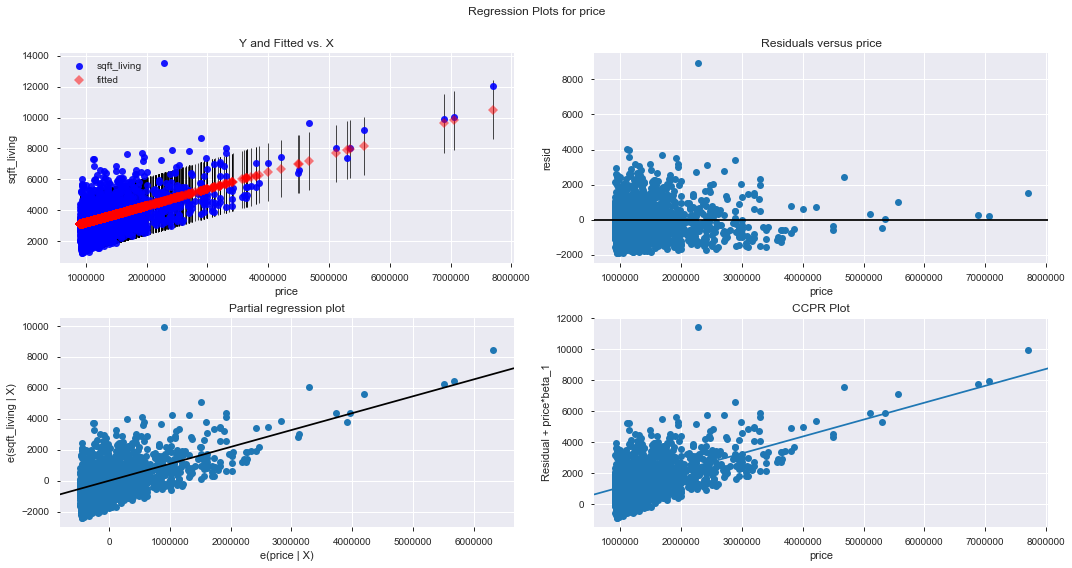

In [170]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "price", fig=fig)
plt.show()

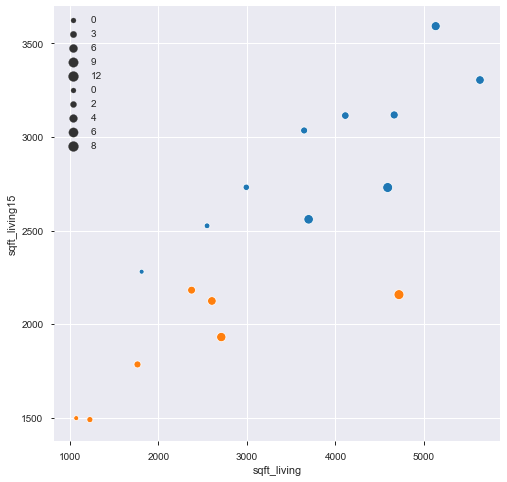

In [139]:
plt.figure(figsize = (8,8))
ax = sns.scatterplot(me_bed_mean['sqft_living'],me_bed_mean['sqft_living15'], size = me_bed_mean.index.values)
ax2 = sns.scatterplot(df_sample_bed_mean['sqft_living'],df_sample_bed_mean['sqft_living15'], size = df_sample_bed_mean.index.values)

In [140]:
sqftlivingmean = 'sqft_living15~sqft_living'
model = ols(sqftlivingmean, data = me_bed_mean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqft_living15   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     20.09
Date:                Tue, 22 Oct 2019   Prob (F-statistic):            0.00205
Time:                        09:10:23   Log-Likelihood:                -67.341
No. Observations:                  10   AIC:                             138.7
Df Residuals:                       8   BIC:                             139.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1790.5642    257.565      6.952      0.000    1196.618    2384.511
sqft_living     0.2855      0.064      4.482      0.002       0.139       0.432
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.303
Skew:                          -0.295   Prob(JB):                        0.860
Kurtosis:                       2.385   Cond. No.                     1.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

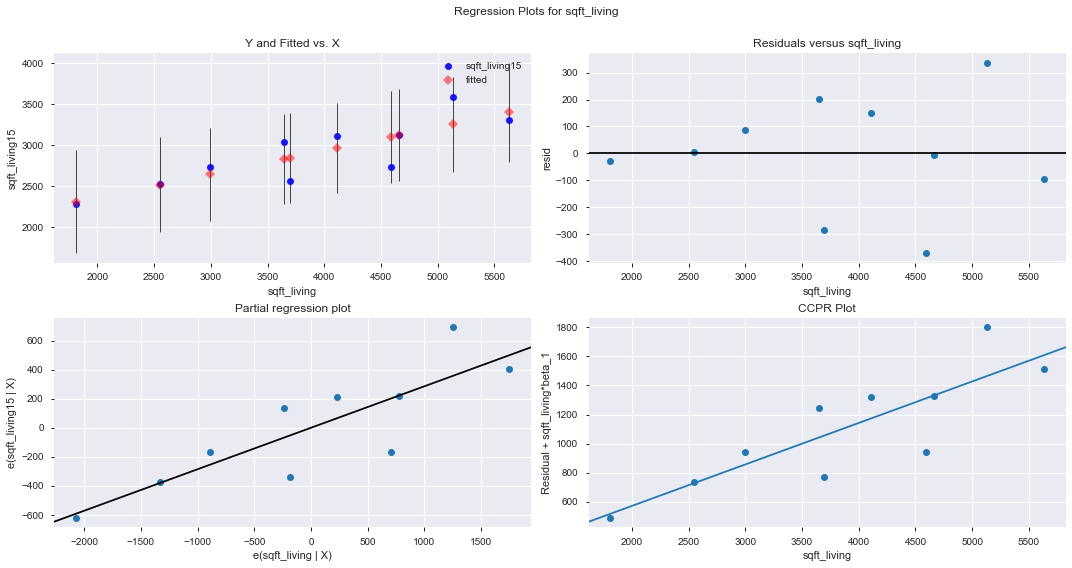

In [141]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [142]:
sqftlivingsamplemean = 'sqft_living15~sqft_living'
model = ols(sqftlivingsamplemean, data = df_sample_bed_mean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqft_living15   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     7.974
Date:                Tue, 22 Oct 2019   Prob (F-statistic):             0.0369
Time:                        09:11:04   Log-Likelihood:                -45.968
No. Observations:                   7   AIC:                             95.94
Df Residuals:                       5   BIC:                             95.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1430.9424    176.860      8.091      0.000     976.311    1885.574
sqft_living     0.1912      0.068      2.824      0.037       0.017       0.365
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.952
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.744
Skew:                           0.561   Prob(JB):                        0.689
Kurtosis:                       1.864   Cond. No.                     6.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

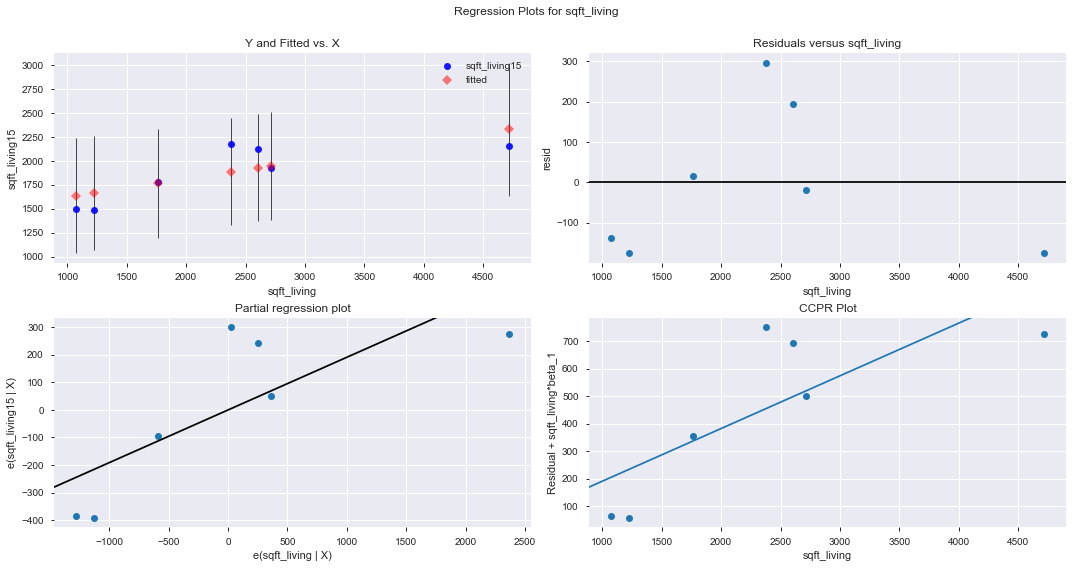

In [143]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

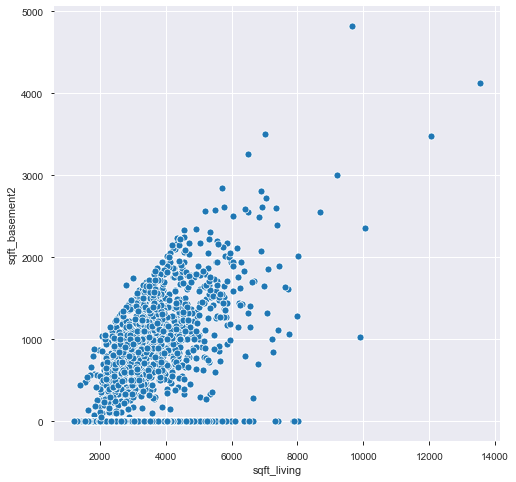

In [153]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(most_expensive_2000['sqft_living'], most_expensive_2000['sqft_basement2'])

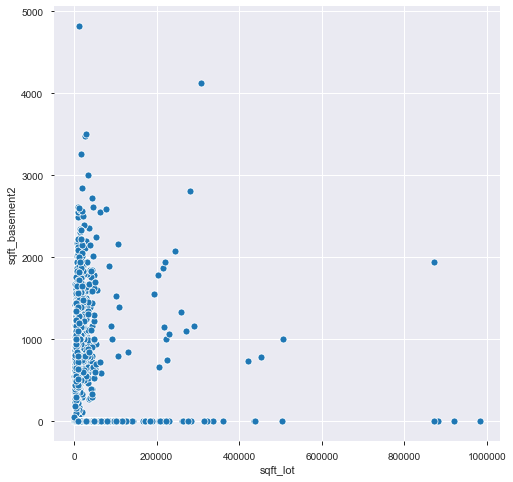

In [155]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(most_expensive_2000['sqft_lot'],most_expensive_2000['sqft_basement2'])

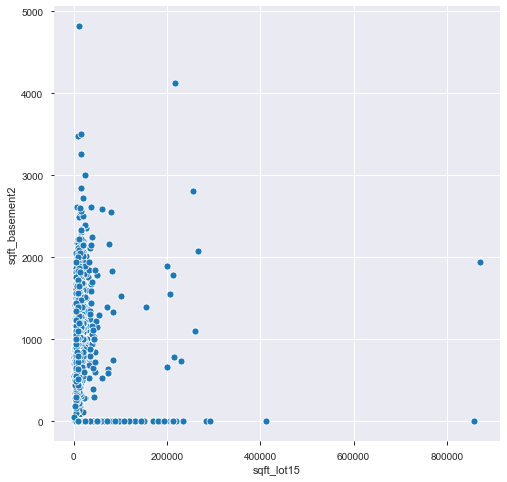

In [156]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(most_expensive_2000['sqft_lot15'], most_expensive_2000['sqft_basement2'])

In [159]:
sqftbasement = 'sqft_basement2~sqft_living15'
model = ols(sqftbasement, data = most_expensive_2000).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sqft_basement2   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     14.00
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           0.000188
Time:                        09:15:53   Log-Likelihood:                -15831.
No. Observations:                2000   AIC:                         3.167e+04
Df Residuals:                    1998   BIC:                         3.168e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       422.7686     54.620      7.740      0.000     315.650     529.887
sqft_living15     0.0661      0.018      3.741      0.000       0.031       0.101
==============================================================================
Omnibus:                      205.066   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.818
Skew:                           0.835   Prob(JB):                     3.48e-60
Kurtosis:                       3.704   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
sqftabove = 'sqft_above~sqft_living'
model = ols(sqftabove, data = most_expensive_2000).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqft_above   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     4226.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:15:58   Log-Likelihood:                -15690.
No. Observations:                2000   AIC:                         3.138e+04
Df Residuals:                    1998   BIC:                         3.140e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     158.7360     45.747      3.470      0.001      69.019     248.453
sqft_living     0.7846      0.012     65.009      0.000       0.761       0.808
==============================================================================
Omnibus:                       94.703   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.987
Skew:                          -0.315   Prob(JB):                     2.10e-14
Kurtosis:                       2.402   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

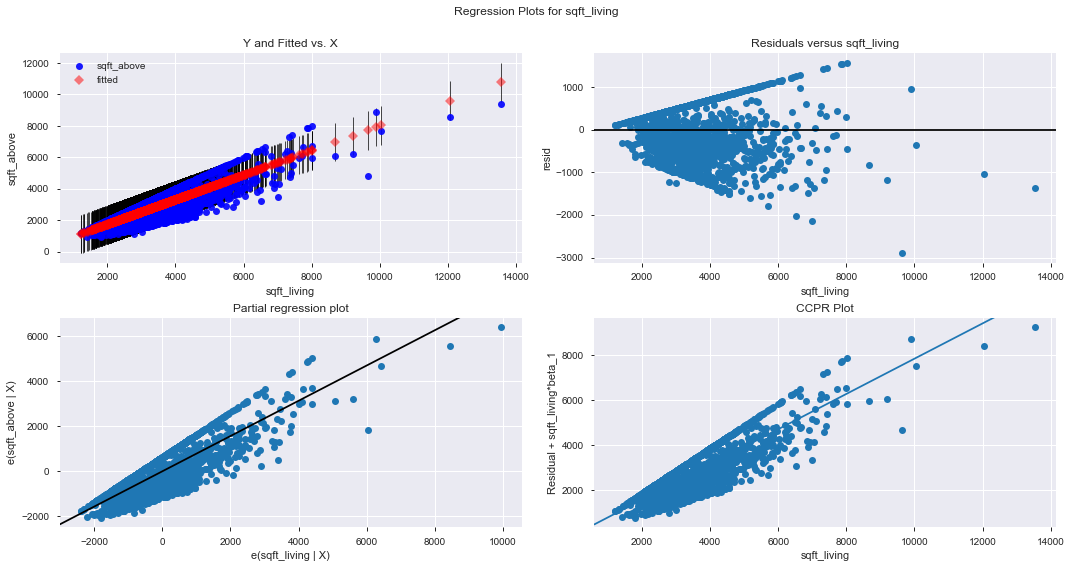

In [161]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [162]:
sqftabove_sample = 'sqft_above~sqft_living'
model = ols(sqftabove_sample, data = df_sample2000).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqft_above   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     5047.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:16:26   Log-Likelihood:                -14653.
No. Observations:                2000   AIC:                         2.931e+04
Df Residuals:                    1998   BIC:                         2.932e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     125.6247     23.266      5.400      0.000      79.997     171.252
sqft_living     0.8049      0.011     71.045      0.000       0.783       0.827
==============================================================================
Omnibus:                      189.443   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.993
Skew:                          -0.857   Prob(JB):                     3.83e-54
Kurtosis:                       3.104   Cond. No.                     5.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

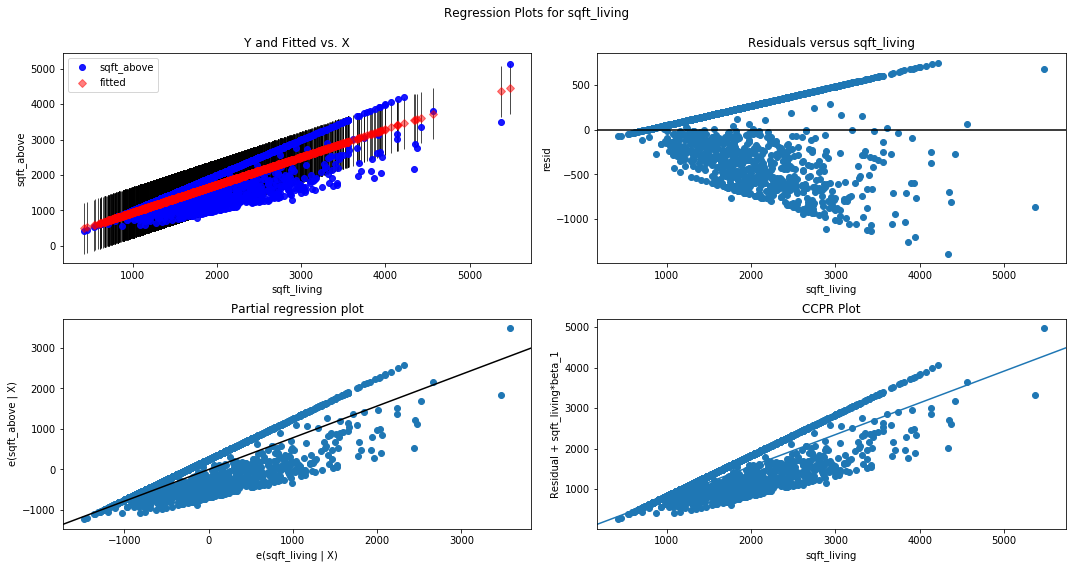

In [161]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [298]:
roomprice = 'price~sqft_above'
model = ols(roomprice, data = df)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:58:54   Log-Likelihood:            -3.0242e+05
No. Observations:               21594   AIC:                         6.048e+05
Df Residuals:                   21592   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.976e+04   4737.905     12.613      0.000    5.05e+04     6.9e+04
sqft_above   268.6729      2.404    111.760      0.000     263.961     273.385
==============================================================================
Omnibus:                    16488.601   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728018.654
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.686   Cond. No.                     4.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

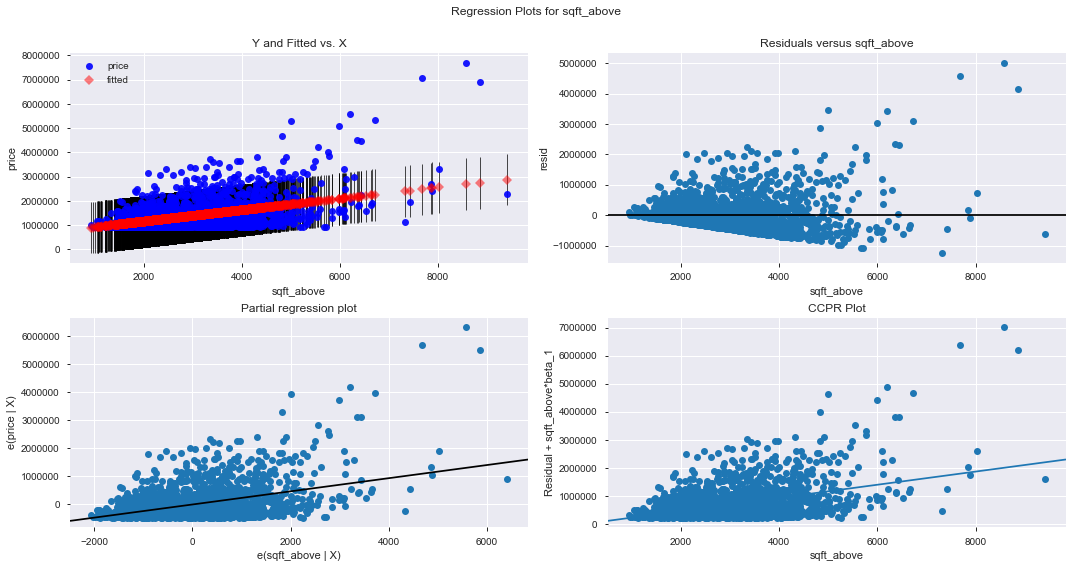

In [210]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, 'sqft_above', fig=fig)
plt.show()

In [215]:
living15price = 'price~sqft_living15'
model = ols(living15price, data = most_expensive_2000)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     154.0
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           4.02e-34
Time:                        10:03:02   Log-Likelihood:                -29362.
No. Observations:                2000   AIC:                         5.873e+04
Df Residuals:                    1998   BIC:                         5.874e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       8.15e+05   4.74e+04     17.205      0.000    7.22e+05    9.08e+05
sqft_living15   190.2168     15.327     12.410      0.000     160.157     220.276
==============================================================================
Omnibus:                     1481.656   Durbin-Watson:                   0.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35573.903
Skew:                           3.245   Prob(JB):                         0.00
Kurtosis:                      22.616   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

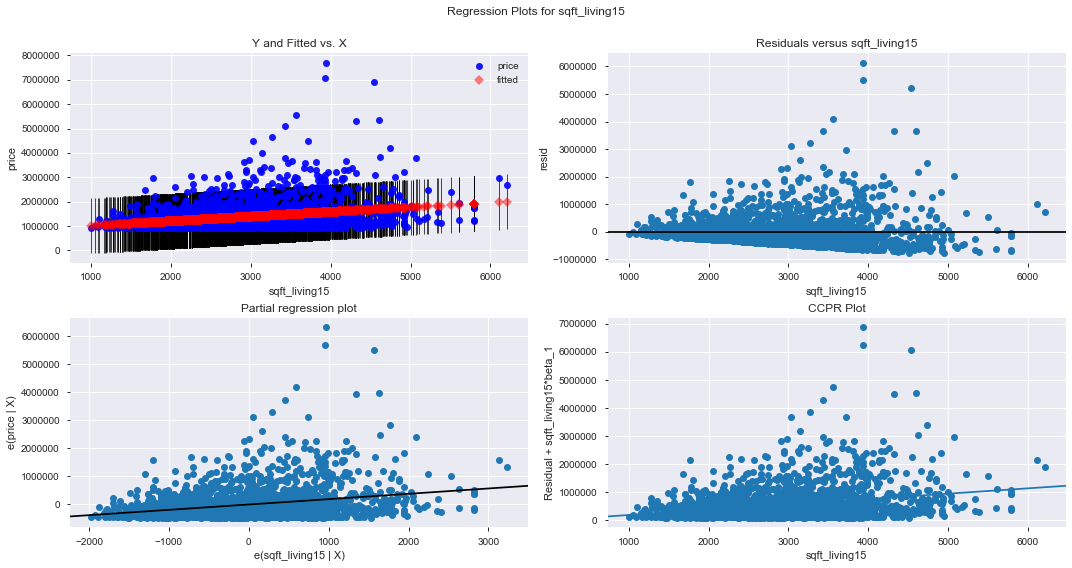

In [216]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, 'sqft_living15', fig=fig)
plt.show()

In [299]:
price_sqftliving = 'price ~ sqft_living'
model = ols(price_sqftliving, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:59:19   Log-Likelihood:            -3.0002e+05
No. Observations:               21594   AIC:                         6.000e+05
Df Residuals:                   21592   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.349     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8651      1.940    144.810      0.000     277.063     284.667
==============================================================================
Omnibus:                    14798.824   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542418.256
Skew:                           2.819   Prob(JB):                         0.00
Kurtosis:                      26.897   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [300]:
price_sqftliving_beds = 'price ~ sqft_living + bedrooms'
model = ols(price_sqftliving_beds, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 1.110e+04
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:59:33   Log-Likelihood:            -2.9972e+05
No. Observations:               21594   AIC:                         5.994e+05
Df Residuals:                   21591   BIC:                         5.995e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     8.09e+04   6639.419     12.185      0.000    6.79e+04    9.39e+04
sqft_living   314.6022      2.344    134.222      0.000     310.008     319.196
bedrooms    -5.783e+04   2323.192    -24.893      0.000   -6.24e+04   -5.33e+04
==============================================================================
Omnibus:                    14388.466   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488388.841
Skew:                           2.728   Prob(JB):                         0.00
Kurtosis:                      25.651   Cond. No.                     8.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [301]:
price_sqftliving_beds_grade = 'price ~ sqft_living + bedrooms + grade'
model = ols(price_sqftliving_beds_grade, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     8528.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:59:41   Log-Likelihood:            -2.9891e+05
No. Observations:               21594   AIC:                         5.978e+05
Df Residuals:                   21590   BIC:                         5.979e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.714e+05   1.49e+04    -31.556      0.000   -5.01e+05   -4.42e+05
sqft_living   215.8690      3.305     65.315      0.000     209.391     222.347
bedrooms    -4.298e+04   2267.357    -18.957      0.000   -4.74e+04   -3.85e+04
grade        9.241e+04   2258.764     40.911      0.000     8.8e+04    9.68e+04
==============================================================================
Omnibus:                    16450.856   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           883499.451
Skew:                           3.180   Prob(JB):                         0.00
Kurtosis:                      33.684   Cond. No.                     2.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [302]:
price_sqftliving_beds_condition = 'price ~ sqft_living + bedrooms +condition'
model = ols(price_sqftliving_beds_condition, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     7624.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:59:52   Log-Likelihood:            -2.9955e+05
No. Observations:               21594   AIC:                         5.991e+05
Df Residuals:                   21590   BIC:                         5.991e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -8.5e+04   1.12e+04     -7.600      0.000   -1.07e+05   -6.31e+04
sqft_living   318.5322      2.336    136.376      0.000     313.954     323.110
bedrooms      -6.1e+04   2311.778    -26.387      0.000   -6.55e+04   -5.65e+04
condition    4.939e+04   2690.453     18.358      0.000    4.41e+04    5.47e+04
==============================================================================
Omnibus:                    14392.484   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           496380.404
Skew:                           2.723   Prob(JB):                         0.00
Kurtosis:                      25.848   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [303]:
price_sqftliving_beds_yrbuilt = 'price ~ sqft_living + bedrooms + yr_built'
model = ols(price_sqftliving_beds_yrbuilt, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     8462.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:00:05   Log-Likelihood:            -2.9896e+05
No. Observations:               21594   AIC:                         5.979e+05
Df Residuals:                   21590   BIC:                         5.980e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.802e+06   1.19e+05     40.317      0.000    4.57e+06    5.04e+06
sqft_living   341.1132      2.359    144.581      0.000     336.489     345.738
bedrooms    -6.108e+04   2244.335    -27.216      0.000   -6.55e+04   -5.67e+04
yr_built    -2417.9187     60.912    -39.695      0.000   -2537.310   -2298.527
==============================================================================
Omnibus:                    13873.344   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           463243.547
Skew:                           2.587   Prob(JB):                         0.00
Kurtosis:                      25.093   Cond. No.                     2.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [304]:
price_sqftliving_beds_yrbuilt_long= 'price ~ sqft_living + bedrooms + yr_built +long'
model = ols(price_sqftliving_beds_yrbuilt_long, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     6570.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:00:13   Log-Likelihood:            -2.9875e+05
No. Observations:               21594   AIC:                         5.975e+05
Df Residuals:                   21589   BIC:                         5.976e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -2.89e+07   1.66e+06    -17.377      0.000   -3.22e+07   -2.56e+07
sqft_living   346.0635      2.350    147.273      0.000     341.458     350.669
bedrooms     -6.09e+04   2223.255    -27.390      0.000   -6.53e+04   -5.65e+04
yr_built    -1941.6339     64.733    -29.994      0.000   -2068.516   -1814.751
long         -2.68e+05   1.32e+04    -20.316      0.000   -2.94e+05   -2.42e+05
==============================================================================
Omnibus:                    13528.411   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           448368.096
Skew:                           2.493   Prob(JB):                         0.00
Kurtosis:                      24.759   Cond. No.                     2.92e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [289]:
price_sqftliving_beds_yrbuilt_long_lat= 'price ~ sqft_living + bedrooms + yr_built +long+lat'
model = ols(price_sqftliving_beds_yrbuilt_long_lat, data = most_expensive_2000).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     283.6
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          1.75e-229
Time:                        12:31:21   Log-Likelihood:                -28899.
No. Observations:                2000   AIC:                         5.781e+04
Df Residuals:                    1994   BIC:                         5.784e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.575e+08    1.4e+07    -11.263      0.000   -1.85e+08    -1.3e+08
sqft_living   381.4875     10.629     35.892      0.000     360.643     402.332
bedrooms    -5.995e+04   1.26e+04     -4.756      0.000   -8.47e+04   -3.52e+04
yr_built    -2105.7624    369.678     -5.696      0.000   -2830.758   -1380.766
long        -1.256e+06   1.02e+05    -12.275      0.000   -1.46e+06   -1.06e+06
lat           1.77e+05   1.64e+05      1.077      0.281   -1.45e+05    4.99e+05
==============================================================================
Omnibus:                      701.160   Durbin-Watson:                   0.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4188.087
Skew:                           1.523   Prob(JB):                         0.00
Kurtosis:                       9.401   Cond. No.                     5.81e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [305]:
price_sqftliving_beds_yrbuilt_long_lot= 'price ~ sqft_living + bedrooms + yr_built +long+ sqft_lot'
model = ols(price_sqftliving_beds_yrbuilt_long_lot, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     5269.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:00:29   Log-Likelihood:            -2.9874e+05
No. Observations:               21594   AIC:                         5.975e+05
Df Residuals:                   21588   BIC:                         5.975e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.697e+07    1.7e+06    -15.850      0.000   -3.03e+07   -2.36e+07
sqft_living   348.1567      2.381    146.219      0.000     343.490     352.824
bedrooms    -6.193e+04   2230.392    -27.768      0.000   -6.63e+04   -5.76e+04
yr_built    -1970.6766     64.923    -30.354      0.000   -2097.930   -1843.424
long        -2.527e+05   1.35e+04    -18.724      0.000   -2.79e+05   -2.26e+05
sqft_lot       -0.2248      0.042     -5.319      0.000      -0.308      -0.142
==============================================================================
Omnibus:                    13505.132   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           443268.427
Skew:                           2.490   Prob(JB):                         0.00
Kurtosis:                      24.630   Cond. No.                     4.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [290]:
price_sqftliving = 'price ~ sqft_living'
model = ols(price_sqftliving, data = df_sample2000).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     1094.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          1.09e-191
Time:                        12:37:55   Log-Likelihood:                -26632.
No. Observations:                2000   AIC:                         5.327e+04
Df Residuals:                    1998   BIC:                         5.328e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.679e+05   9285.503     18.083      0.000     1.5e+05    1.86e+05
sqft_living   149.5449      4.522     33.074      0.000     140.678     158.412
==============================================================================
Omnibus:                       41.804   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.911
Skew:                           0.342   Prob(JB):                     4.81e-10
Kurtosis:                       2.785   Cond. No.                     5.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [291]:
price_sqftliving_beds = 'price ~ sqft_living + bedrooms'
model = ols(price_sqftliving_beds, data = df_sample2000).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     567.8
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          6.01e-196
Time:                        12:38:28   Log-Likelihood:                -26618.
No. Observations:                2000   AIC:                         5.324e+04
Df Residuals:                    1997   BIC:                         5.326e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.164e+05   1.31e+04     16.531      0.000    1.91e+05    2.42e+05
sqft_living   166.7500      5.572     29.929      0.000     155.823     177.677
bedrooms    -2.488e+04   4765.426     -5.220      0.000   -3.42e+04   -1.55e+04
==============================================================================
Omnibus:                       41.476   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.256
Skew:                           0.350   Prob(JB):                     4.05e-10
Kurtosis:                       2.834   Cond. No.                     8.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [294]:
price_sqftliving_beds_yrbuilt = 'price ~ sqft_living + bedrooms + yr_built'
model = ols(price_sqftliving_beds_yrbuilt, data = df_sample2000).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     420.7
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          9.72e-212
Time:                        12:39:08   Log-Likelihood:                -26578.
No. Observations:                2000   AIC:                         5.316e+04
Df Residuals:                    1996   BIC:                         5.319e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.278e+06   2.29e+05      9.927      0.000    1.83e+06    2.73e+06
sqft_living   183.1347      5.759     31.801      0.000     171.841     194.428
bedrooms    -2.635e+04   4675.665     -5.636      0.000   -3.55e+04   -1.72e+04
yr_built    -1059.7765    117.775     -8.998      0.000   -1290.751    -828.802
==============================================================================
Omnibus:                       16.692   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.968
Skew:                           0.218   Prob(JB):                     0.000207
Kurtosis:                       2.887   Cond. No.                     2.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [295]:
price_sqftliving_beds_yrbuilt_long= 'price ~ sqft_living + bedrooms + yr_built +long+ sqft'
model = ols(price_sqftliving_beds_yrbuilt_long, data = df_sample2000).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     320.2
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          5.38e-213
Time:                        12:39:32   Log-Likelihood:                -26572.
No. Observations:                2000   AIC:                         5.315e+04
Df Residuals:                    1995   BIC:                         5.318e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.351e+06   3.07e+06     -2.720      0.007   -1.44e+07   -2.33e+06
sqft_living   185.8362      5.795     32.067      0.000     174.471     197.202
bedrooms     -2.67e+04   4663.841     -5.725      0.000   -3.58e+04   -1.76e+04
yr_built     -918.1347    124.334     -7.384      0.000   -1161.973    -674.296
long        -8.465e+04   2.44e+04     -3.472      0.001   -1.32e+05   -3.68e+04
==============================================================================
Omnibus:                       11.375   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.521
Skew:                           0.180   Prob(JB):                      0.00315
Kurtosis:                       2.905   Cond. No.                     2.70e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [296]:
price_sqftliving_beds_yrbuilt_long_lot= 'price ~ sqft_living + bedrooms + yr_built +long+ sqft_lot'
model = ols(price_sqftliving_beds_yrbuilt_long_lot, data = df_sample2000).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     257.1
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          2.13e-212
Time:                        13:01:32   Log-Likelihood:                -26571.
No. Observations:                2000   AIC:                         5.315e+04
Df Residuals:                    1994   BIC:                         5.319e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.141e+06   3.14e+06     -2.272      0.023   -1.33e+07   -9.76e+05
sqft_living   187.5998      5.877     31.923      0.000     176.075     199.125
bedrooms    -2.735e+04   4675.690     -5.849      0.000   -3.65e+04   -1.82e+04
yr_built     -937.6907    124.754     -7.516      0.000   -1182.353    -693.029
long        -7.508e+04    2.5e+04     -3.008      0.003   -1.24e+05   -2.61e+04
sqft_lot       -0.1962      0.110     -1.776      0.076      -0.413       0.020
==============================================================================
Omnibus:                       10.759   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.905
Skew:                           0.176   Prob(JB):                      0.00428
Kurtosis:                       2.919   Cond. No.                     3.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""